# Instal library

In [ ]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Untuk visualisasi interaktif
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Atur gaya tampilan
plt.style.use('ggplot')


# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD, FastICA, NMF
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression, VarianceThreshold
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from scipy.stats import zscore, spearmanr, pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from statsmodels.stats.outliers_influence import variance_inflation_factor
from kneed import KneeLocator
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning & Preparation

In [ ]:
# Baca file CSV
df = pd.read_csv('./data/employee_data.csv')

# Tampilkan 5 baris pertama untuk melihat struktur data
display(df.head())

In [ ]:
# Informasi tentang dataset
print("Ukuran dataset:", df.shape)
print("\nInformasi tentang tipe data:")
display(df.info())

In [ ]:
# Statistik deskriptif data numerik
display(df.describe())

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

# Feature Engineering

## Salary Category

In [ ]:
def salary_category(income):
    if income < 5000:
        return 'Rendah (< 5000)'
    elif income < 10000:
        return 'Sedang (5000-10000)'
    elif income < 15000:
        return 'Tinggi (10000-15000)'
    else:
        return 'Sangat Tinggi (>15000)'

df['SalaryCategory'] = df['MonthlyIncome'].apply(salary_category)

## Promotion Category

In [ ]:
def promotion_category(years):
    if years == 0:
        return 'Baru Dipromosikan'
    elif years <= 2:
        return '1-2 Tahun'
    elif years <= 5:
        return '3-5 Tahun'
    else:
        return '> 5 Tahun'

df['PromotionCategory'] = df['YearsSinceLastPromotion'].apply(promotion_category)

## Age Category

In [ ]:
# Buat kategori usia
def age_category(age):
    if age < 30:
        return '< 30'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    else:
        return '50+'

df['AgeGroup'] = df['Age'].apply(age_category)

## Satisfaction Category

In [ ]:
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 
                     'RelationshipSatisfaction', 'WorkLifeBalance']
satisfaction_labels = {1: 'Rendah', 2: 'Sedang', 3: 'Tinggi', 4: 'Sangat Tinggi'}

df_satisfaction = df.copy()
for col in satisfaction_cols:
    df_satisfaction[col] = df_satisfaction[col].map(satisfaction_labels)

# Exploratory Data Analysis (EDA)

## Analisis Univariate

### Distribusi Attrition

In [ ]:
attrition_counts = df['Attrition'].value_counts()
attrition_percentage = df['Attrition'].value_counts(normalize=True) * 100

attrition_df = pd.DataFrame({
    'Count': attrition_counts,
    'Percentage': attrition_percentage
})

print("Distribusi Attrition:")
display(attrition_df)

fig = px.pie(
    names=['Tidak Keluar', 'Keluar'] if 0 in attrition_counts.index else ['Keluar', 'Tidak Keluar'],
    values=attrition_counts.values,
    title='Persentase Karyawan yang Keluar vs Bertahan',
    color_discrete_sequence=px.colors.qualitative.Set3,
    hole=0.4
)
fig.update_traces(textinfo='percent+label', textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

fig.write_image("./visualisasi/presentase_attrition.jpg", scale=1)

## Analisis Bivariate

### Attrition by Age

In [ ]:
age_group_attrition = df.groupby('AgeGroup')['Attrition'].mean() * 100
age_group_counts = df.groupby('AgeGroup').size()

order = ['< 30', '30-39', '40-49', '50+']
age_group_attrition = age_group_attrition.reindex(order)
age_group_counts = age_group_counts.reindex(order)

age_group_df = pd.DataFrame({
    'Jumlah Karyawan': age_group_counts,
    'Tingkat Attrition (%)': age_group_attrition
})

display(age_group_df)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=age_group_df.index,
        y=age_group_df['Jumlah Karyawan'],
        name='Jumlah Karyawan',
        marker_color='royalblue',
        opacity=0.7
    ),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=age_group_df.index,
        y=age_group_df['Tingkat Attrition (%)'],
        name='Tingkat Attrition (%)',
        marker_color='firebrick',
        mode='lines+markers',
        marker=dict(size=10),
        line=dict(width=3)
    ),
    secondary_y=True
)

fig.update_layout(
    title_text='Distribusi dan Tingkat Attrition Berdasarkan Kelompok Usia',
    template='plotly_white'
)

fig.update_xaxes(title_text='Kelompok Usia')
fig.update_yaxes(title_text='Jumlah Karyawan', secondary_y=False)
fig.update_yaxes(title_text='Tingkat Attrition (%)', secondary_y=True)

fig.show()
fig.write_image("./visualisasi/distribusi_usia_attrition.jpg", scale=1)

### Attrition by Departemen

In [ ]:
dept_attrition = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False) * 100
dept_counts = df.groupby('Department').size()

dept_df = pd.DataFrame({
    'Jumlah Karyawan': dept_counts,
    'Tingkat Attrition (%)': dept_attrition
})

display(dept_df)

fig = px.bar(
    x=dept_attrition.index,
    y=dept_attrition.values,
    color=dept_attrition.values,
    text=dept_attrition.values.round(1),
    title='Tingkat Attrition (%) Berdasarkan Departemen',
    labels={'x': 'Departemen', 'y': 'Tingkat Attrition (%)'},
    color_continuous_scale='Viridis'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(coloraxis_showscale=False, template='plotly_white')

fig.show()

fig.write_image("./visualisasi/tingkat_attrition_departemen.jpg", scale=1)

### Attrition by JobLevel

In [ ]:
joblevel_attrition = df.groupby('JobLevel')['Attrition'].mean().sort_values(ascending=False) * 100
joblevel_counts = df.groupby('JobLevel').size()

joblevel_df = pd.DataFrame({
    'Tingkat Attrition (%)': joblevel_attrition,
    'Jumlah Karyawan': joblevel_counts
})

display(joblevel_df)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=joblevel_df.index,
    y=joblevel_df['Jumlah Karyawan'],
    name='Jumlah Karyawan',
    marker_color='lightblue',
    opacity=0.7,
    yaxis='y'
))

fig.add_trace(go.Scatter(
    x=joblevel_df.index,
    y=joblevel_df['Tingkat Attrition (%)'],
    name='Tingkat Attrition (%)',
    marker_color='red',
    mode='lines+markers',
    marker=dict(size=10),
    yaxis='y2'
))

fig.update_layout(
    title='Distribusi Attrition dan Jumlah Karyawan berdasarkan Job Level',
    xaxis=dict(title='Job Level'),
    yaxis=dict(title='Jumlah Karyawan', side='left', showgrid=False),
    yaxis2=dict(title='Tingkat Attrition (%)', side='right', overlaying='y', showgrid=False),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()

fig.write_image("./visualisasi/attrition_job_level.jpg", scale=2)

### Attrition by MaritalStatus

In [ ]:
marital_attrition = df.groupby('MaritalStatus')['Attrition'].mean() * 100
marital_counts = df.groupby('MaritalStatus').size()

marital_df = pd.DataFrame({
    'Jumlah Karyawan': marital_counts,
    'Tingkat Attrition (%)': marital_attrition
})

display(marital_df)

custom_labels = [f"{status}<br>Attrition: {attrition:.1f}%" 
                for status, attrition in zip(marital_attrition.index, marital_attrition.values)]

fig = go.Figure(go.Pie(
    labels=custom_labels,
    values=marital_counts.values,
    hole=0.4,
    textposition='outside',
    textinfo='percent', 
    pull=[0.05, 0.05, 0.05],
    marker=dict(
        colors=['#F9D876', '#F98B60', '#61D4D5'],
        line=dict(color='#FFFFFF', width=2)
    )
))

fig.update_layout(
    title='Distribusi Karyawan Berdasarkan Status Pernikahan',
    template='plotly_white',
    legend_title='Status Pernikahan & Tingkat Attrition',
    margin=dict(t=80, b=20, l=20, r=20),
    height=600,
    width=800
)

fig.add_annotation(
    text="Status<br>Pernikahan",
    x=0.5, y=0.5,
    font_size=14,
    showarrow=False
)

fig.show()

fig.write_image("./visualisasi/distribusi_status_pernikahan.jpg", scale=2)

### Attrition by Distance

In [ ]:
distance_stats = df.groupby('Attrition')['DistanceFromHome'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

distance_stats['Attrition'] = distance_stats['Attrition'].map({0: 'Tidak Keluar', 1: 'Keluar'})

display(distance_stats)

fig = px.box(
    df, 
    x='Attrition', 
    y='DistanceFromHome',
    color='Attrition',
    title='Hubungan Jarak dari Rumah dengan Attrition',
    labels={'DistanceFromHome': 'Jarak dari Rumah (km)', 'Attrition': 'Status Keluar'},
    color_discrete_sequence=['#636EFA', '#EF553B']
)
fig.update_layout(template='plotly_white')

fig.show()

fig.write_image("./visualisasi/jarak_rumah_attrition.jpg", scale=2)

### Attrtion by Satisfaction

In [ ]:
df_satisfaction = df.copy()
for col in satisfaction_cols:
    df_satisfaction[col] = df_satisfaction[col].map(satisfaction_labels)

display(df_satisfaction)

fig = make_subplots(rows=2, cols=2, 
                   subplot_titles=['Kepuasan Lingkungan', 'Kepuasan Kerja', 
                                  'Kepuasan Hubungan', 'Work Life Balance'],)

col_positions = [
    ('EnvironmentSatisfaction', 1, 1),
    ('JobSatisfaction', 1, 2),
    ('RelationshipSatisfaction', 2, 1),
    ('WorkLifeBalance', 2, 2)
]

for col, row, col_pos in col_positions:
    attrition_by_satisfaction = df_satisfaction.groupby(col)['Attrition'].mean() * 100
    
    fig.add_trace(
        go.Bar(
            x=attrition_by_satisfaction.index,
            y=attrition_by_satisfaction.values,
            text=[f'{val:.1f}%' for val in attrition_by_satisfaction.values],
            textposition='auto',
            marker_color='lightseagreen'
        ),
        row=row, col=col_pos
    )

fig.update_layout(
    height=600,
    width=900,
    showlegend=False,
    title_text='Tingkat Attrition (%) Berdasarkan Faktor Kepuasan',
    template='plotly_white'
)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=12, color='#000000')

fig.update_xaxes(title_text='Tingkat Kepuasan')
fig.update_yaxes(title_text='Tingkat Attrition (%)')

fig.show()

fig.write_image("./visualisasi/tingkat_attrition_kepuasan.jpg", scale=2)

### Attrition by JobRole

In [ ]:
jobrole_attrition = df.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False) * 100
jobrole_counts = df.groupby('JobRole').size()

jobrole_df = pd.DataFrame({
    'Tingkat Attrition (%)': jobrole_attrition,
    'Jumlah Karyawan': jobrole_counts
})

display(jobrole_df)

fig = px.bar(
    x=jobrole_attrition.index,
    y=jobrole_attrition.values,
    color=jobrole_attrition.values,
    text=jobrole_attrition.values.round(1),
    title='Tingkat Attrition (%) Berdasarkan Job Role',
    labels={'x': 'Job Role', 'y': 'Tingkat Attrition (%)'},
    color_continuous_scale='Viridis'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
    coloraxis_showscale=False,
    xaxis_tickangle=-45,
    template='plotly_white'
)
fig.show()

fig.write_image("./visualisasi/tingkat_attrition_job_role.jpg", scale=2)

### Attrition by Overtime

In [ ]:
overtime_attrition = df.groupby('OverTime')['Attrition'].mean() * 100
overtime_counts = df.groupby('OverTime').size()

overtime_df = pd.DataFrame({
    'Jumlah Karyawan': overtime_counts,
    'Tingkat Attrition (%)': overtime_attrition
})

display(overtime_df)

fig = px.bar(
    x=overtime_attrition.index,
    y=overtime_attrition.values,
    color=overtime_attrition.values,
    text=overtime_attrition.values.round(1),
    title='Tingkat Attrition (%) Berdasarkan Status Overtime',
    labels={'x': 'Overtime', 'y': 'Tingkat Attrition (%)'},
    color_continuous_scale='Reds'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(coloraxis_showscale=False, template='plotly_white')
fig.show()

fig.write_image("./visualisasi/tingkat_attrition_overtime.jpg", scale=2)

### Attrition by Salary Category

In [ ]:
salary_attrition = df.groupby('SalaryCategory')['Attrition'].mean() * 100
salary_counts = df.groupby('SalaryCategory').size()

order = ['Rendah (< 5000)', 'Sedang (5000-10000)', 'Tinggi (10000-15000)', 'Sangat Tinggi (>15000)']
salary_attrition = salary_attrition.reindex(order)
salary_counts = salary_counts.reindex(order)

salary_df = pd.DataFrame({
    'Jumlah Karyawan': salary_counts,
    'Tingkat Attrition (%)': salary_attrition
})

display(salary_df)

fig = px.bar(
    x=salary_attrition.index,
    y=salary_attrition.values,
    color=salary_attrition.values,
    text=salary_attrition.values.round(1),
    title='Tingkat Attrition (%) Berdasarkan Kategori Gaji',
    labels={'x': 'Kategori Gaji', 'y': 'Tingkat Attrition (%)'},
    color_continuous_scale='Greens_r'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(coloraxis_showscale=False, template='plotly_white')
fig.show()
fig.write_image("./visualisasi/tingkat_attrition_kategori_gaji.jpg", scale=2)

### Attrition by Gender

In [ ]:
gender_attrition = df.groupby('Gender')['Attrition'].mean() * 100
gender_counts = df.groupby('Gender').size()

gender_df = pd.DataFrame({
    'Jumlah Karyawan': gender_counts,
    'Tingkat Attrition (%)': gender_attrition
})

display(gender_df)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=gender_counts.index,
    y=gender_counts.values,
    name='Jumlah Karyawan',
    marker_color='skyblue',
    opacity=0.7,
    text=gender_counts.values,
    textposition='auto',
    yaxis='y'
))

fig.add_trace(go.Scatter(
    x=gender_attrition.index,
    y=gender_attrition.values,
    name='Tingkat Attrition (%)',
    marker_color='red',
    mode='lines+markers+text',
    marker=dict(size=12),
    text=[f'{val:.1f}%' for val in gender_attrition.values],
    textposition='top center',
    yaxis='y2'
))

fig.update_layout(
    title='Jumlah Karyawan dan Tingkat Attrition Berdasarkan Jenis Kelamin',
    xaxis=dict(title='Jenis Kelamin'),
    yaxis=dict(title='Jumlah Karyawan', side='left', showgrid=False),
    yaxis2=dict(title='Tingkat Attrition (%)', side='right', overlaying='y', showgrid=False),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()
fig.write_image("./visualisasi/tingkat_attrition_jenis_kelamin.jpg", scale=2)

### Attrition by Education Background

In [ ]:
education_field_attrition = df.groupby('EducationField')['Attrition'].mean() * 100
education_field_counts = df.groupby('EducationField').size()

education_field_df = pd.DataFrame({
    'Jumlah Karyawan': education_field_counts,
    'Tingkat Attrition (%)': education_field_attrition
})

education_field_df = education_field_df.sort_values('Tingkat Attrition (%)', ascending=False)
display(education_field_df)

fig = px.bar(
    education_field_df,
    x=education_field_df.index,
    y='Tingkat Attrition (%)',
    color='Tingkat Attrition (%)',
    text=education_field_df['Tingkat Attrition (%)'].round(1),
    title='Tingkat Attrition (%) Berdasarkan Bidang Pendidikan',
    labels={'y': 'Tingkat Attrition (%)', 'x': 'Bidang Pendidikan'},
    color_continuous_scale='Blues_r'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(coloraxis_showscale=False, template='plotly_white')
fig.show()
fig.write_image("./visualisasi/tingkat_attrition_bidang_pendidikan.jpg", scale=2)

### Attrition by LastTimePromoted

In [ ]:
promotion_attrition = df.groupby('PromotionCategory')['Attrition'].mean() * 100
promotion_counts = df.groupby('PromotionCategory').size()

order = ['Baru Dipromosikan', '1-2 Tahun', '3-5 Tahun', '> 5 Tahun']
promotion_attrition = promotion_attrition.reindex(order)
promotion_counts = promotion_counts.reindex(order)

promotion_df = pd.DataFrame({
    'Jumlah Karyawan': promotion_counts,
    'Tingkat Attrition (%)': promotion_attrition
})

display(promotion_df)

fig = px.line(
    x=promotion_attrition.index,
    y=promotion_attrition.values,
    markers=True,
    text=promotion_attrition.values.round(1),
    title='Tingkat Attrition (%) Berdasarkan Tahun Sejak Promosi Terakhir',
    labels={'x': 'Tahun Sejak Promosi Terakhir', 'y': 'Tingkat Attrition (%)'},
)
fig.update_traces(
    marker=dict(size=10, color='blue'),
    line=dict(width=3, color='purple'),
    textposition='top center'
)
fig.update_layout(template='plotly_white')
fig.show()
fig.write_image("./visualisasi/tingkat_attrition_promotion.jpg", scale=2)

## Multivariate

In [ ]:
# 1. Analisis multivariate: Overtime, Job Satisfaction, dan Attrition
# Membuat tabel pivot untuk melihat interaksi antara overtime dan tingkat kepuasan kerja
pivot_overtime_satisfaction = pd.crosstab(
    index=df['OverTime'],
    columns=df['JobSatisfaction'],
    values=df['Attrition'],
    aggfunc='mean'
) * 100

# Ubah nilai job satisfaction menjadi kategori untuk memudahkan pembacaan
satisfaction_labels = {1: 'Rendah', 2: 'Sedang', 3: 'Tinggi', 4: 'Sangat Tinggi'}
pivot_overtime_satisfaction.columns = [satisfaction_labels[col] for col in pivot_overtime_satisfaction.columns]

# Tampilkan dataframe
print("Tingkat Attrition (%) berdasarkan Overtime dan Job Satisfaction:")
display(pivot_overtime_satisfaction)

# Visualisasi dengan heatmap
fig = px.imshow(
    pivot_overtime_satisfaction,
    text_auto='.1f',
    aspect='auto',
    color_continuous_scale='RdYlGn_r',
    title='Tingkat Attrition (%) Berdasarkan Overtime dan Job Satisfaction',
    labels=dict(x='Tingkat Kepuasan Kerja', y='Overtime', color='Attrition Rate (%)')
)
fig.update_layout(template='plotly_white')
fig.show()

# Simpan gambar
fig.write_image("./visualisasi/attrition_overtime_jobsatisfaction.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_overtime_jobsatisfaction.jpg'")

In [ ]:
# 2. Analisis multivariate: Department, Job Level, dan Attrition
# Membuat tabel pivot untuk melihat interaksi antara department dan job level
pivot_dept_joblevel = pd.crosstab(
    index=df['Department'],
    columns=df['JobLevel'],
    values=df['Attrition'],
    aggfunc='mean'
) * 100

# Tampilkan dataframe
print("Tingkat Attrition (%) berdasarkan Department dan Job Level:")
display(pivot_dept_joblevel)

# Visualisasi dengan heatmap
fig = px.imshow(
    pivot_dept_joblevel,
    text_auto='.1f',
    aspect='auto',
    color_continuous_scale='Viridis_r',
    title='Tingkat Attrition (%) Berdasarkan Department dan Job Level',
    labels=dict(x='Job Level', y='Department', color='Attrition Rate (%)')
)
fig.update_layout(template='plotly_white')
fig.show()

# Simpan gambar
fig.write_image("./visualisasi/attrition_department_joblevel.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_department_joblevel.jpg'")

In [ ]:
# 3. Analisis multivariate: Gaji, Jarak dari Rumah, Overtime, dan Attrition
# Scatter plot dengan multiple dimensions
fig = px.scatter(
    df,
    x='MonthlyIncome',
    y='DistanceFromHome',
    color='Attrition',
    facet_col='OverTime',
    opacity=0.7,
    hover_name='JobRole',
    hover_data=['Age', 'YearsAtCompany', 'JobSatisfaction'],
    title='Hubungan antara Gaji, Jarak dari Rumah, Overtime dengan Attrition',
    labels={
        'MonthlyIncome': 'Gaji Bulanan',
        'DistanceFromHome': 'Jarak dari Rumah (km)',
        'Attrition': 'Status Attrition',
        'OverTime': 'Status Overtime'
    },
    color_discrete_sequence=['green', 'red']
)
fig.update_layout(
    template='plotly_white',
    height=600
)
fig.show()

# Simpan gambar
fig.write_image("./visualisasi/attrition_income_distance_overtime.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_income_distance_overtime.jpg'")

In [ ]:
# 4. Analisis multivariate: Usia, Job Level, dan Attrition
# Buat kategori usia
if 'AgeGroup' not in df.columns:
    df['AgeGroup'] = pd.cut(
        df['Age'],
        bins=[20, 30, 40, 50, 60],
        labels=['20-29', '30-39', '40-49', '50-59']
    )

# Buat tabel pivot
pivot_age_joblevel = pd.crosstab(
    index=df['AgeGroup'],
    columns=df['JobLevel'],
    values=df['Attrition'],
    aggfunc='mean'
) * 100

# Tampilkan dataframe
print("Tingkat Attrition (%) berdasarkan Kelompok Usia dan Job Level:")
display(pivot_age_joblevel)

# Visualisasi dengan heatmap
fig = px.imshow(
    pivot_age_joblevel,
    text_auto='.1f',
    aspect='auto',
    color_continuous_scale='Plasma_r',
    title='Tingkat Attrition (%) Berdasarkan Kelompok Usia dan Job Level',
    labels=dict(x='Job Level', y='Kelompok Usia', color='Attrition Rate (%)')
)
fig.update_layout(template='plotly_white')
fig.show()

# Simpan gambar
fig.write_image("./visualisasi/attrition_age_joblevel.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_age_joblevel.jpg'")

In [ ]:
# Analisis kombinasi overtime dan work-life balance
cross_analysis = pd.crosstab(
    index=df['OverTime'],
    columns=df['WorkLifeBalance'],
    values=df['Attrition'],
    aggfunc='mean'
) * 100

# Ubah nilai worklife balance menjadi label
cross_analysis.columns = ['Buruk', 'Sedang', 'Baik', 'Sangat Baik']

display(cross_analysis)

# Visualisasi dengan heatmap
fig = px.imshow(
    cross_analysis,
    text_auto='.1f',
    aspect='auto',
    color_continuous_scale='RdYlGn_r',
    title='Tingkat Attrition (%) Berdasarkan Overtime dan Work-Life Balance',
    labels=dict(x='Work-Life Balance', y='Overtime', color='Attrition Rate (%)')
)
fig.update_layout(template='plotly_white')
fig.show()

In [ ]:
# 5. Analisis multivariate: 3D Scatter Plot - Gaji, Tahun di Perusahaan, Jarak dari Rumah, dan Attrition
fig = px.scatter_3d(
    df,
    x='MonthlyIncome',
    y='YearsAtCompany',
    z='DistanceFromHome',
    color='Attrition',
    opacity=0.7,
    size='JobLevel',
    hover_name='JobRole',
    title='Hubungan 3D antara Gaji, Tahun Bekerja, Jarak dari Rumah, dan Attrition',
    labels={
        'MonthlyIncome': 'Gaji Bulanan',
        'YearsAtCompany': 'Tahun di Perusahaan',
        'DistanceFromHome': 'Jarak dari Rumah (km)',
        'Attrition': 'Status Attrition',
        'JobLevel': 'Level Pekerjaan'
    },
    color_discrete_sequence=['green', 'red']
)
fig.update_layout(
    template='plotly_white',
    scene=dict(
        xaxis_title='Gaji Bulanan',
        yaxis_title='Tahun di Perusahaan',
        zaxis_title='Jarak dari Rumah (km)'
    )
)
fig.show()

# Simpan gambar
fig.write_image("./visualisasi/attrition_3d_income_years_distance.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_3d_income_years_distance.jpg'")

In [ ]:
# 6. Analisis multivariate: Parallel Coordinates Plot untuk melihat banyak dimensi sekaligus
# Pilih kolom numerik yang relevan
cols_for_parallel = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 
                     'WorkLifeBalance', 'JobSatisfaction', 'JobLevel']

# Buat Parallel Coordinates Plot
fig = px.parallel_coordinates(
    df, 
    color='Attrition',
    dimensions=cols_for_parallel,
    color_continuous_scale=px.colors.diverging.Tealrose,
    title='Parallel Coordinates Plot untuk Berbagai Dimensi dan Attrition'
)
fig.update_layout(
    template='plotly_white',
    height=600
)
fig.show()

# Simpan gambar
fig.write_image("./visualisasi/attrition_parallel_coordinates.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_parallel_coordinates.jpg'")

In [ ]:
# 7. Analisis multivariate: Bubble Chart untuk Department, Job Role, Job Satisfaction dan Attrition
# Hitung tingkat attrition berdasarkan kombinasi department dan job role
attrition_by_dept_role = df.groupby(['Department', 'JobRole'])['Attrition'].mean() * 100
count_by_dept_role = df.groupby(['Department', 'JobRole']).size()
satisfaction_by_dept_role = df.groupby(['Department', 'JobRole'])['JobSatisfaction'].mean()

# Buat dataframe
multivariate_df = pd.DataFrame({
    'Tingkat Attrition (%)': attrition_by_dept_role,
    'Jumlah Karyawan': count_by_dept_role,
    'Rata-rata Kepuasan Kerja': satisfaction_by_dept_role
}).reset_index()

# Tampilkan dataframe
print("Tingkat Attrition (%), Jumlah Karyawan, dan Rata-rata Kepuasan Kerja berdasarkan Department dan Job Role:")
display(multivariate_df.sort_values('Tingkat Attrition (%)', ascending=False))

# Visualisasi dengan bubble chart
fig = px.scatter(
    multivariate_df,
    x='Rata-rata Kepuasan Kerja',
    y='Tingkat Attrition (%)',
    size='Jumlah Karyawan',
    color='Department',
    hover_name='JobRole',
    text='JobRole',
    title='Tingkat Attrition (%) vs Kepuasan Kerja berdasarkan Department dan Job Role',
    labels={
        'Rata-rata Kepuasan Kerja': 'Rata-rata Kepuasan Kerja (1-4)',
        'Tingkat Attrition (%)': 'Tingkat Attrition (%)'
    }
)
fig.update_traces(
    textposition='top center',
    marker=dict(sizemode='area', sizeref=0.1)
)
fig.update_layout(
    template='plotly_white',
    height=800,
    width=1000
)
fig.show()

# Simpan gambar
fig.write_image("./visualisasi/attrition_dept_role_satisfaction.jpg", scale=2)
print("Visualisasi telah disimpan sebagai './visualisasi/attrition_dept_role_satisfaction.jpg'")

In [ ]:
# Pastikan semua feature engineering dan variabel baru yang ingin disimpan sudah dibuat

# Buat daftar variabel baru yang telah dibuat
new_variables = [
    'SalaryCategory',        # Kategori gaji
    'PromotionCategory',     # Kategori tahun sejak promosi terakhir
    'AgeGroup',              # Kelompok usia
    'DistanceCategory'       # Kategori jarak dari rumah
]

# Periksa variabel mana yang sudah ada di dataframe
existing_variables = [var for var in new_variables if var in df.columns]

# Jika ada variabel yang belum dibuat, buat terlebih dahulu
if 'SalaryCategory' not in existing_variables:
    df['SalaryCategory'] = df['MonthlyIncome'].apply(lambda income: 
        'Rendah (< 5000)' if income < 5000 else
        'Sedang (5000-10000)' if income < 10000 else
        'Tinggi (10000-15000)' if income < 15000 else
        'Sangat Tinggi (>15000)'
    )

if 'PromotionCategory' not in existing_variables:
    df['PromotionCategory'] = df['YearsSinceLastPromotion'].apply(lambda years:
        'Baru Dipromosikan' if years == 0 else
        '1-2 Tahun' if years <= 2 else
        '3-5 Tahun' if years <= 5 else
        '> 5 Tahun'
    )

if 'AgeGroup' not in existing_variables:
    df['AgeGroup'] = df['Age'].apply(lambda age:
        '< 30' if age < 30 else
        '30-39' if age < 40 else
        '40-49' if age < 50 else
        '50+'
    )

if 'DistanceCategory' not in existing_variables:
    df['DistanceCategory'] = pd.cut(
        df['DistanceFromHome'],
        bins=[0, 5, 10, 20, 30],
        labels=['0-5 km', '6-10 km', '11-20 km', '21-30 km']
    )

# Tampilkan kolom-kolom yang ada di data final
print("Kolom-kolom dalam dataset final:")
display(pd.DataFrame({'Nama Kolom': df.columns}))

# Simpan data final
df.to_csv('./data/data_final_employee.csv', index=False)

# Jika ingin menyimpan dalam format Excel
try:
    df.to_excel('./data/data_final_employee.xlsx', index=False)
except Exception as e:
    print(f"Gagal menyimpan dalam format Excel: {e}")

# Segmentation Using Unsupervised Learning

Jumlah baris setelah menghapus nilai yang hilang: 1058


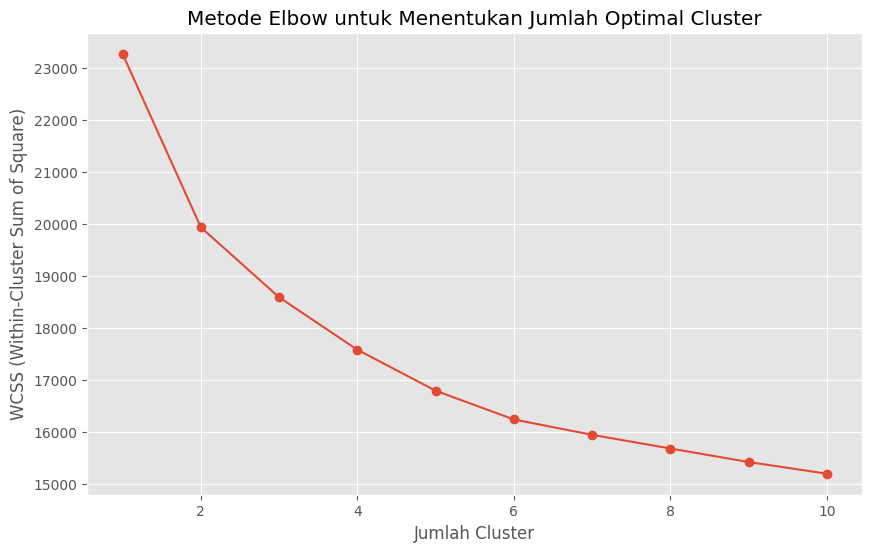

Untuk n_clusters = 2, silhouette score adalah 0.157
Untuk n_clusters = 3, silhouette score adalah 0.137
Untuk n_clusters = 4, silhouette score adalah 0.103
Untuk n_clusters = 5, silhouette score adalah 0.109
Untuk n_clusters = 6, silhouette score adalah 0.080
Untuk n_clusters = 7, silhouette score adalah 0.068
Untuk n_clusters = 8, silhouette score adalah 0.070
Untuk n_clusters = 9, silhouette score adalah 0.063
Untuk n_clusters = 10, silhouette score adalah 0.059


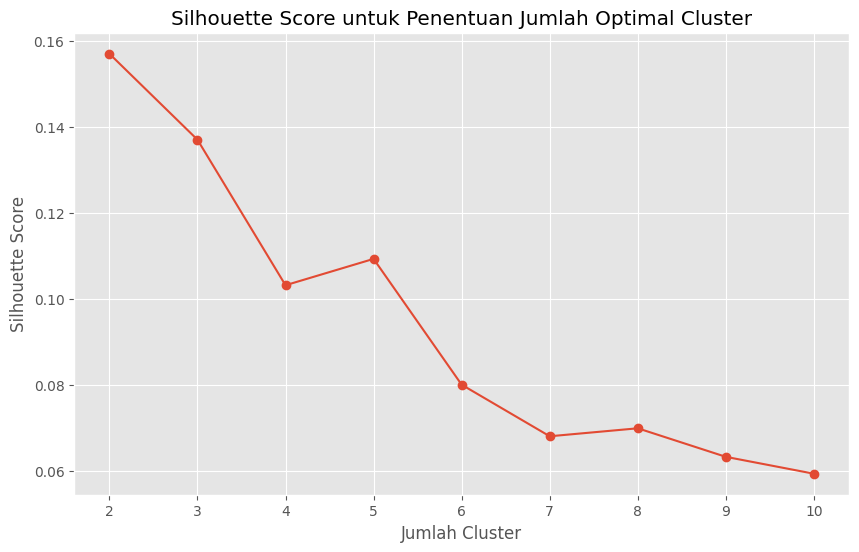


Ringkasan Cluster:
   Cluster        Age  MonthlyIncome  YearsAtCompany  JobSatisfaction  \
0        0  34.757143    4789.207143        5.607143         2.700000   
1        1  48.789157   15479.271084       14.463855         2.656627   
2        2  34.363107    4343.139806        3.444660         2.778641   
3        3  36.046414    6470.400844       10.611814         2.780591   

   WorkLifeBalance  EnvironmentSatisfaction  DistanceFromHome  Attrition  
0         2.692857                 2.542857          9.907143   0.200000  
1         2.740964                 2.813253          7.620482   0.084337  
2         2.780583                 2.685437          9.085437   0.215534  
3         2.784810                 2.801688          9.147679   0.109705  


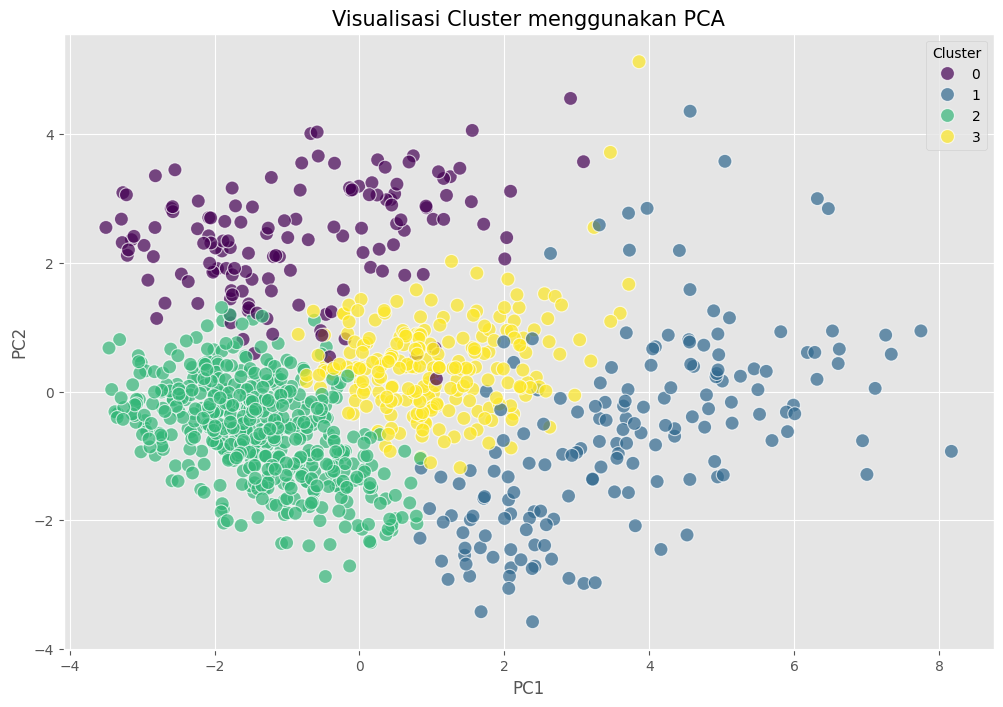

<Figure size 1200x600 with 0 Axes>

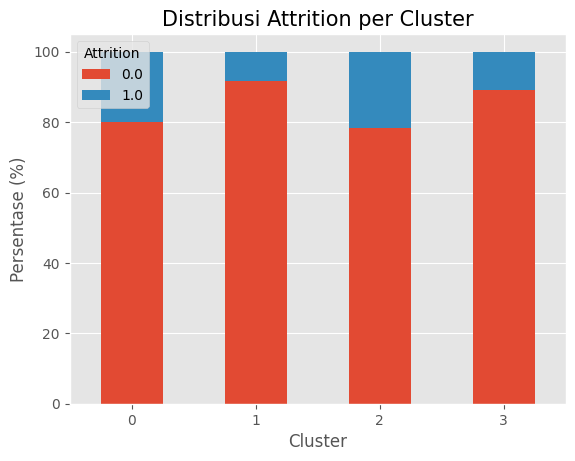

<Figure size 1400x700 with 0 Axes>

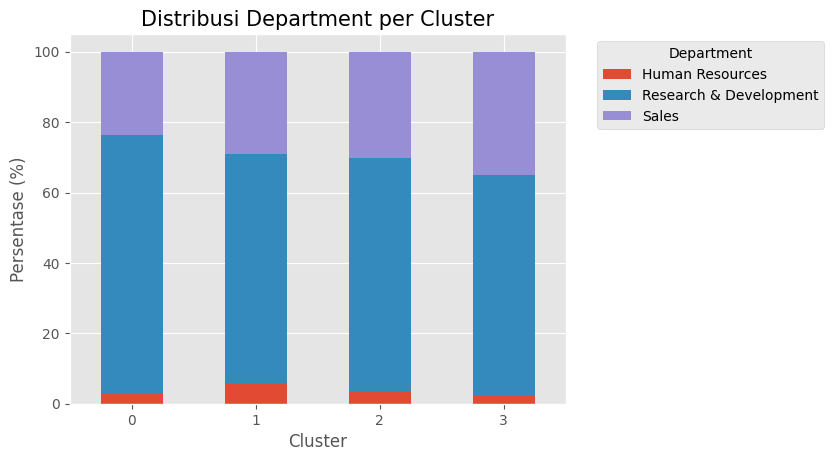

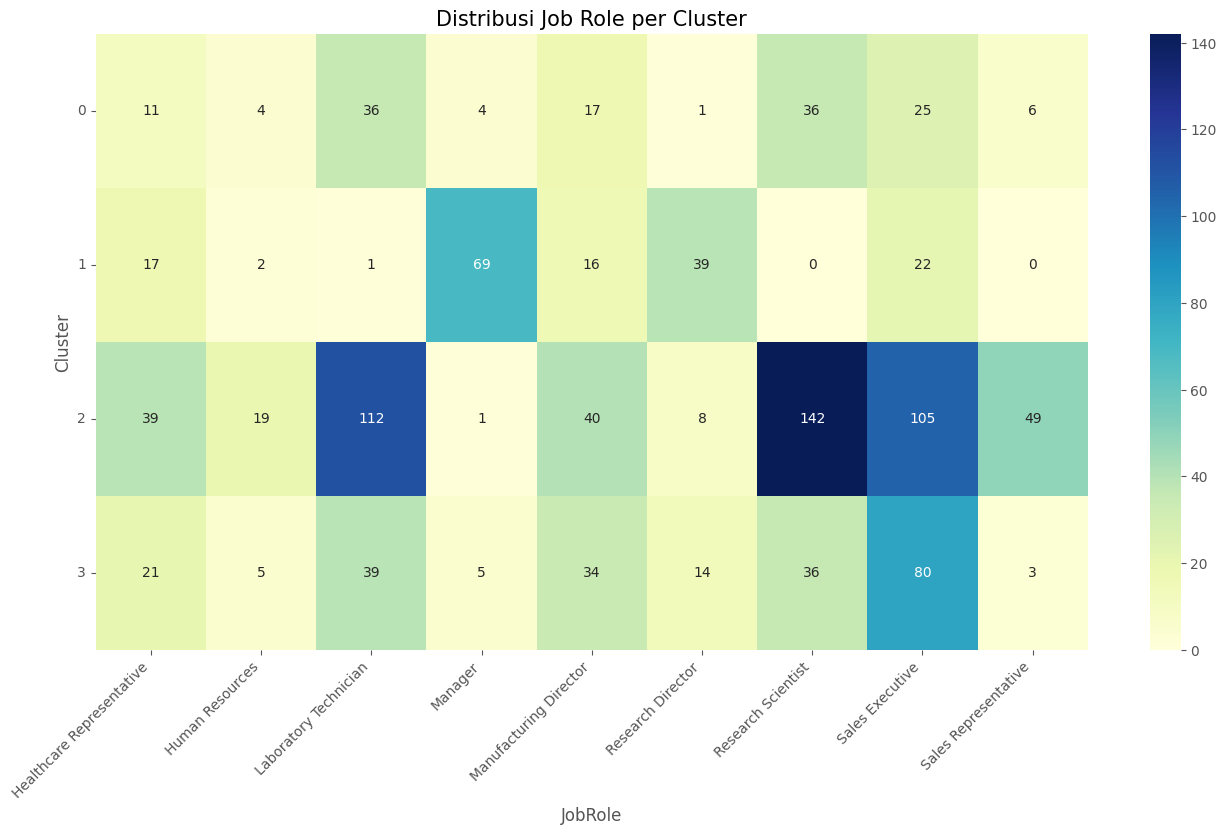

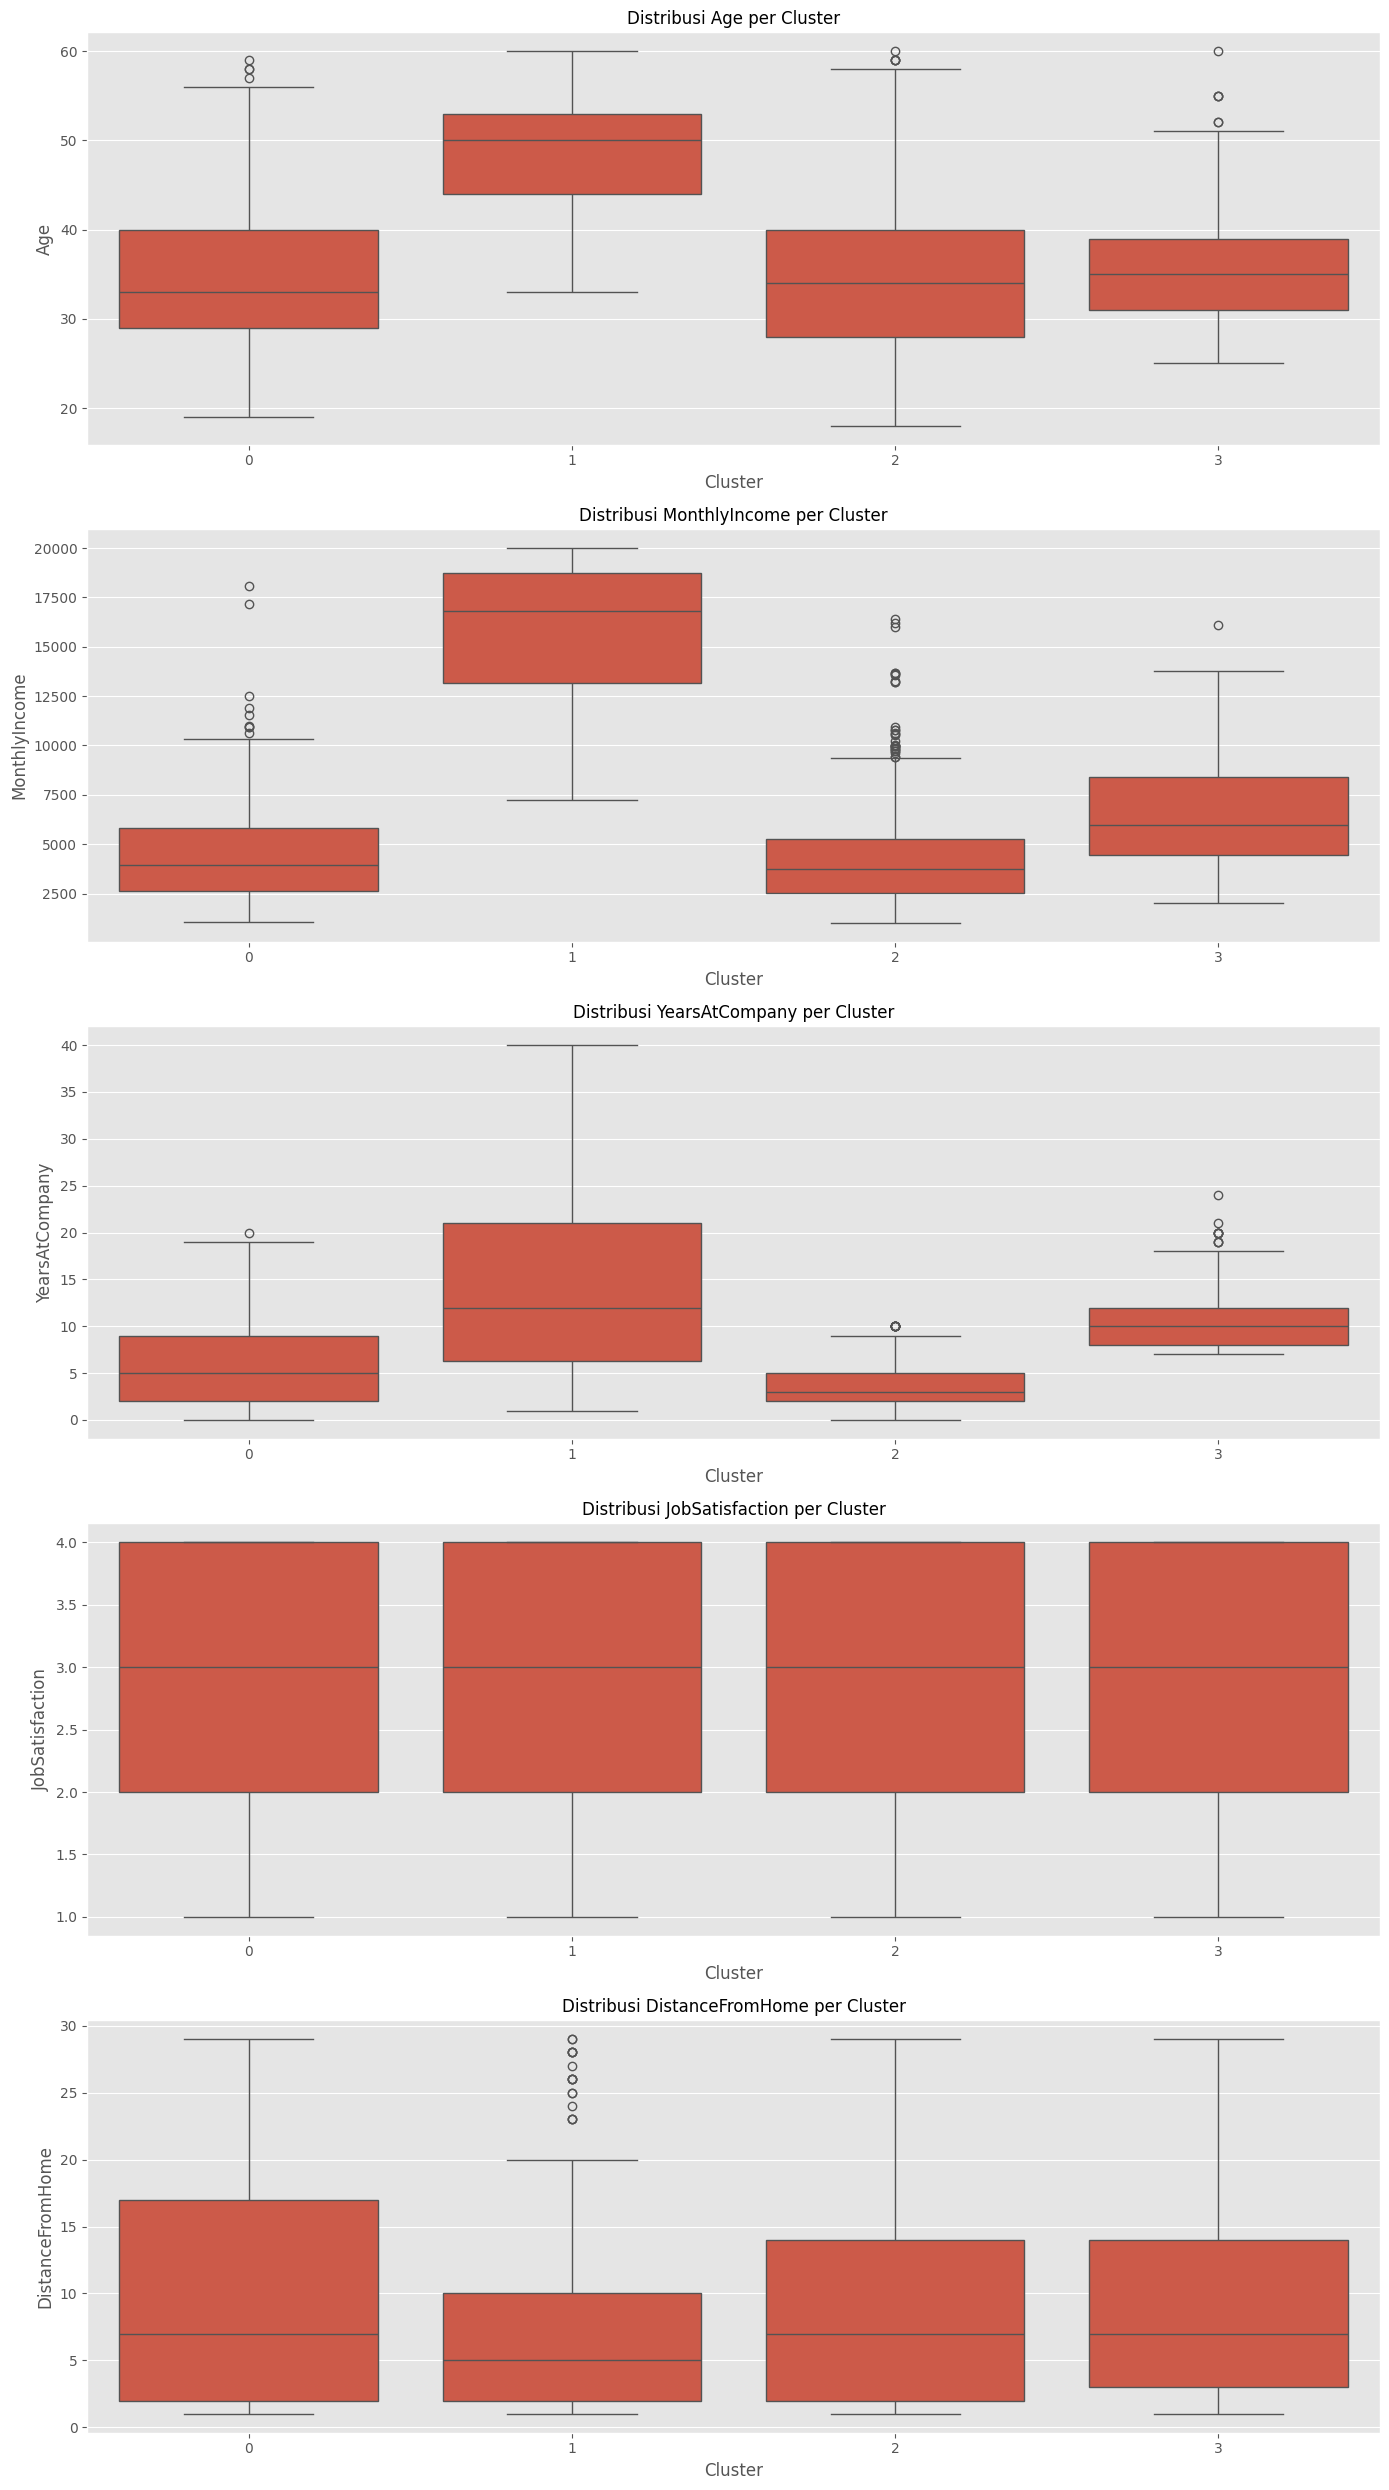


Hasil segmentasi telah disimpan dalam file 'employee_segmentation_results.csv'

Interpretasi Cluster:

Cluster 0 (140 karyawan):
  Rata-rata usia: 34.8 tahun
  Rata-rata gaji bulanan: $4789.21
  Rata-rata masa kerja: 5.6 tahun
  Rata-rata kepuasan kerja: 2.70/4
  Rata-rata keseimbangan kerja-hidup: 2.69/4
  Tingkat attrition: 20.0%
  Department dominan: Research & Development
  Job Role dominan: Laboratory Technician (25.7%)

Cluster 1 (166 karyawan):
  Rata-rata usia: 48.8 tahun
  Rata-rata gaji bulanan: $15479.27
  Rata-rata masa kerja: 14.5 tahun
  Rata-rata kepuasan kerja: 2.66/4
  Rata-rata keseimbangan kerja-hidup: 2.74/4
  Tingkat attrition: 8.4%
  Department dominan: Research & Development
  Job Role dominan: Manager (41.6%)

Cluster 2 (515 karyawan):
  Rata-rata usia: 34.4 tahun
  Rata-rata gaji bulanan: $4343.14
  Rata-rata masa kerja: 3.4 tahun
  Rata-rata kepuasan kerja: 2.78/4
  Rata-rata keseimbangan kerja-hidup: 2.78/4
  Tingkat attrition: 21.6%
  Department dominan: Re

In [208]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Baca dataset
df = pd.read_csv('./data/data_final_employee.csv')

# Tangani missing value dengan drop baris (sesuai instruksi)
df.dropna(inplace=True)
print(f"Jumlah baris setelah menghapus nilai yang hilang: {df.shape[0]}")

# Pilih fitur numerik untuk segmentasi
numeric_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education',
    'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 
    'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Ambil subset data numerik
X = df[numeric_features]

# Standarisasi data numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan jumlah optimal cluster menggunakan Metode Elbow
wcss = []  # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot metode Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Metode Elbow untuk Menentukan Jumlah Optimal Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.grid(True)
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

# Validasi dengan Silhouette Score
silhouette_scores = []
for i in range(2, 11):  # Mulai dari 2 karena silhouette tidak didefinisikan untuk 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk n_clusters = {i}, silhouette score adalah {silhouette_avg:.3f}")

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score untuk Penentuan Jumlah Optimal Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig('silhouette_score.png', dpi=300, bbox_inches='tight')
plt.show()

# Berdasarkan metode elbow dan silhouette score, tentukan jumlah optimal cluster
# Misalnya, kita memilih 4 cluster (sesuaikan setelah melihat plot)
optimal_clusters = 4  # Ubah nilai ini setelah melihat hasil

# Aplikasikan K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analisis hasil clustering
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'MonthlyIncome': 'mean',
    'YearsAtCompany': 'mean',
    'JobSatisfaction': 'mean',
    'WorkLifeBalance': 'mean',
    'EnvironmentSatisfaction': 'mean',
    'DistanceFromHome': 'mean',
    'Attrition': 'mean'  # Asumsi Attrition adalah boolean/numerik
}).reset_index()

print("\nRingkasan Cluster:")
print(cluster_summary)

# Visualisasi dengan PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot hasil PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Visualisasi Cluster menggunakan PCA', fontsize=15)
plt.savefig('cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Eksplorasi karakteristik masing-masing cluster
# Distribusi Attrition per Cluster
attrition_by_cluster = pd.crosstab(df['Cluster'], df['Attrition'])
attrition_percentage = attrition_by_cluster.div(attrition_by_cluster.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
attrition_percentage.plot(kind='bar', stacked=True)
plt.title('Distribusi Attrition per Cluster', fontsize=15)
plt.xlabel('Cluster')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.savefig('attrition_by_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribusi Department per Cluster
dept_by_cluster = pd.crosstab(df['Cluster'], df['Department'])
dept_percentage = dept_by_cluster.div(dept_by_cluster.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))
dept_percentage.plot(kind='bar', stacked=True)
plt.title('Distribusi Department per Cluster', fontsize=15)
plt.xlabel('Cluster')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('department_by_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribusi Job Role per Cluster (visualisasi heatmap)
jobrole_by_cluster = pd.crosstab(df['Cluster'], df['JobRole'])

plt.figure(figsize=(16, 8))
sns.heatmap(jobrole_by_cluster, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Distribusi Job Role per Cluster', fontsize=15)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.savefig('jobrole_by_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribusi karakteristik penting per cluster dengan boxplot
important_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'DistanceFromHome']

fig, axes = plt.subplots(len(important_features), 1, figsize=(14, 5*len(important_features)))
for i, feature in enumerate(important_features):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} per Cluster', fontsize=12)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.savefig('boxplot_features_by_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

# Simpan hasil segmentasi
df.to_csv('employee_segmentation_results.csv', index=False)
print("\nHasil segmentasi telah disimpan dalam file 'employee_segmentation_results.csv'")

# Interpretasi cluster
print("\nInterpretasi Cluster:")
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_data)} karyawan):")
    
    # Karakteristik demografis
    print(f"  Rata-rata usia: {cluster_data['Age'].mean():.1f} tahun")
    print(f"  Rata-rata gaji bulanan: ${cluster_data['MonthlyIncome'].mean():.2f}")
    print(f"  Rata-rata masa kerja: {cluster_data['YearsAtCompany'].mean():.1f} tahun")
    
    # Tingkat kepuasan
    print(f"  Rata-rata kepuasan kerja: {cluster_data['JobSatisfaction'].mean():.2f}/4")
    print(f"  Rata-rata keseimbangan kerja-hidup: {cluster_data['WorkLifeBalance'].mean():.2f}/4")
    
    # Tingkat attrition
    print(f"  Tingkat attrition: {cluster_data['Attrition'].mean()*100:.1f}%")
    
    # Department dengan persentase tertinggi
    dept_pct = pd.crosstab(cluster_data['Department'], cluster_data['Cluster'], normalize='columns') * 100
    top_dept = dept_pct.idxmax().values[0]
    print(f"  Department dominan: {top_dept}")
    
    # Job Role dengan persentase tertinggi
    role_counts = cluster_data['JobRole'].value_counts()
    top_role = role_counts.idxmax()
    print(f"  Job Role dominan: {top_role} ({role_counts[top_role]/len(cluster_data)*100:.1f}%)")


MEMBACA DAN MEMPERSIAPKAN DATA
Ukuran dataset: (1058, 39)

Menangani missing value...
Tidak ada missing value ditemukan.

Memilih fitur penting untuk analisis attrition...

Menggunakan 22 fitur numerik dan 7 fitur kategorikal

PREPROCESSING DATA

Membuat pipeline preprocessing...

Melakukan transformasi data...
Bentuk data setelah preprocessing: (1058, 43)

ANALISIS KOMPONEN UTAMA (PCA)

Melakukan reduksi dimensi dengan PCA...

15 komponen menjelaskan >80% varians dalam data
Data setelah PCA: (1058, 15)

METODE CLUSTERING ADVANCED

1. Segmentasi dengan Gaussian Mixture Model (GMM)
  GMM dengan 2 komponen - BIC: 48849.14, AIC: 47503.86
  GMM dengan 3 komponen - BIC: 49242.88, AIC: 47222.47
  GMM dengan 4 komponen - BIC: 49312.02, AIC: 46616.50
  GMM dengan 5 komponen - BIC: 50359.36, AIC: 46988.71
  GMM dengan 6 komponen - BIC: 50304.86, AIC: 46259.09
  GMM dengan 7 komponen - BIC: 50625.84, AIC: 45904.94
  GMM dengan 8 komponen - BIC: 51793.09, AIC: 46397.08
  GMM dengan 9 komponen - 

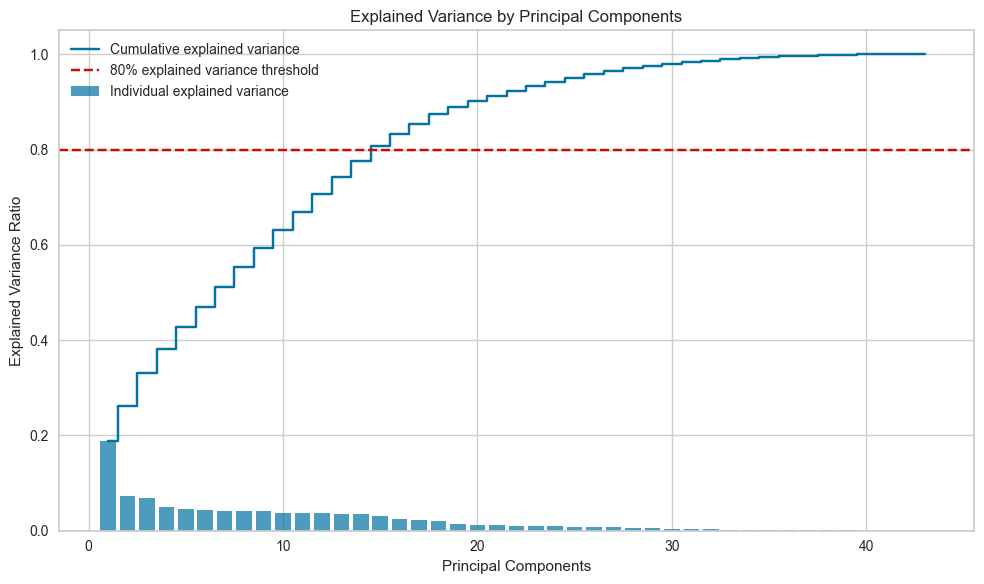

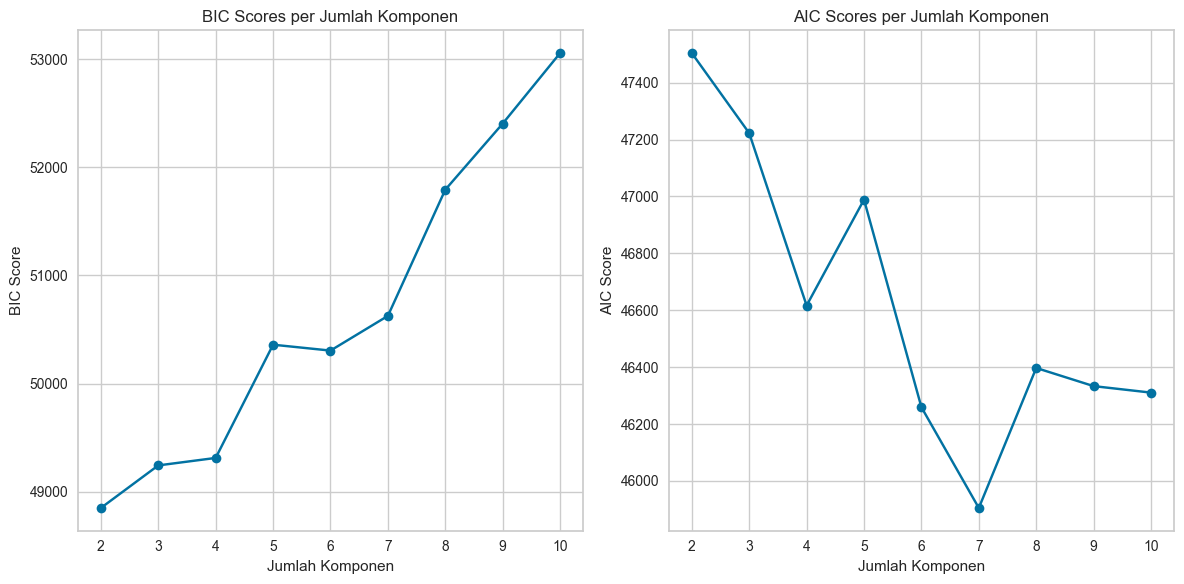

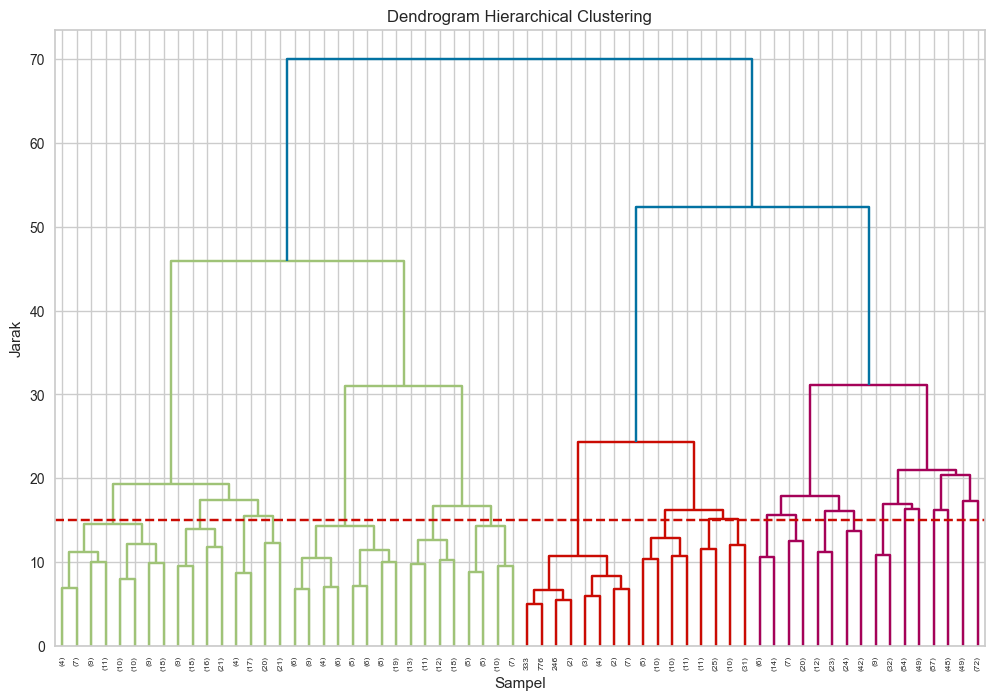

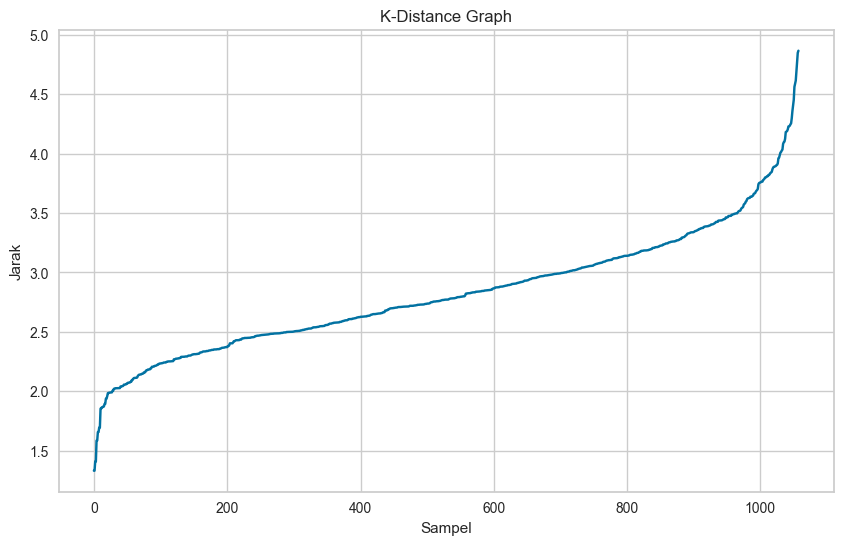

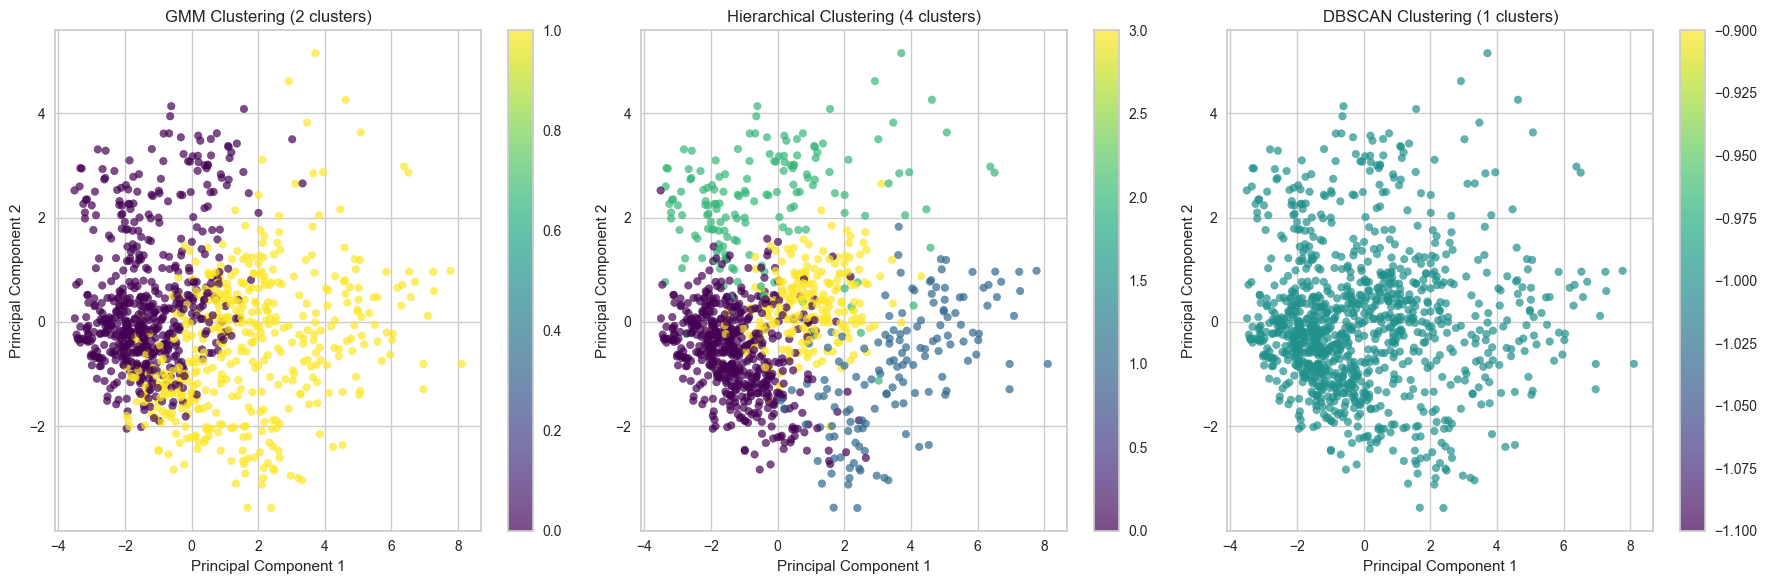

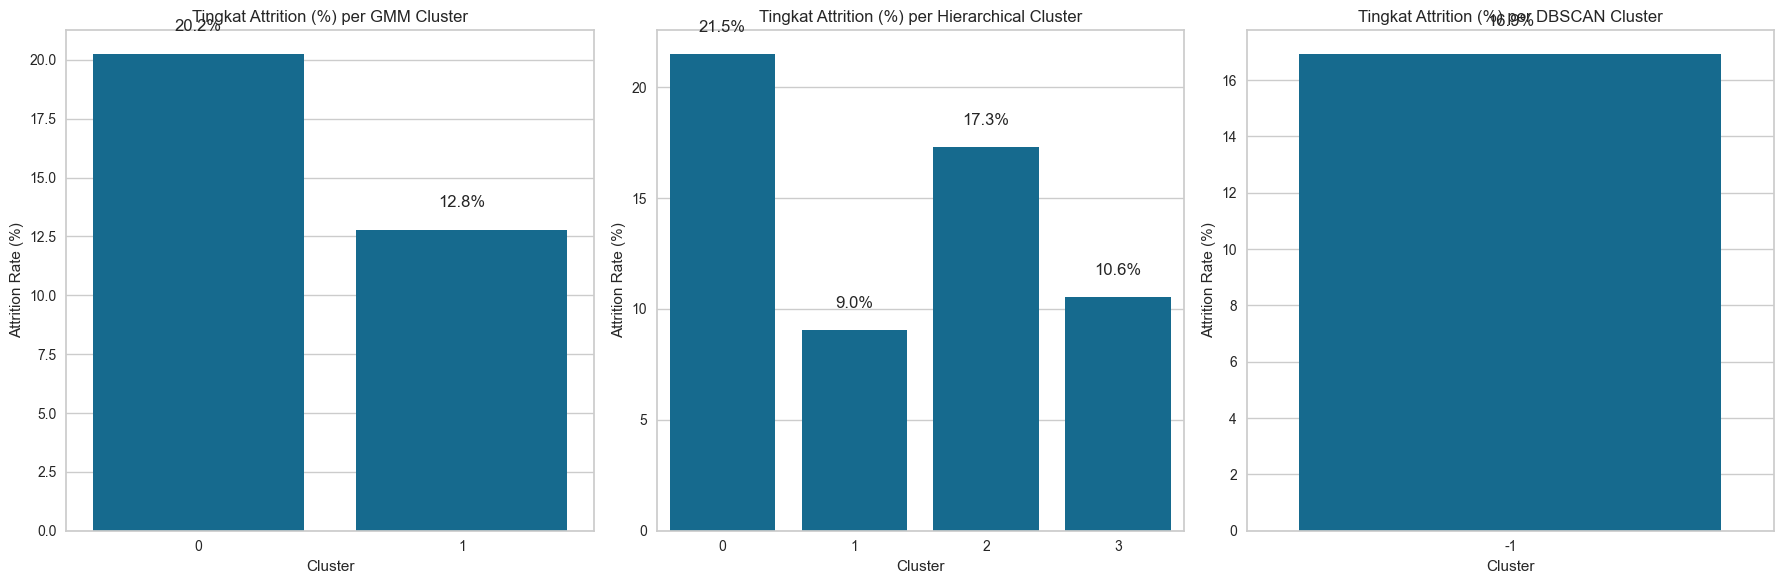

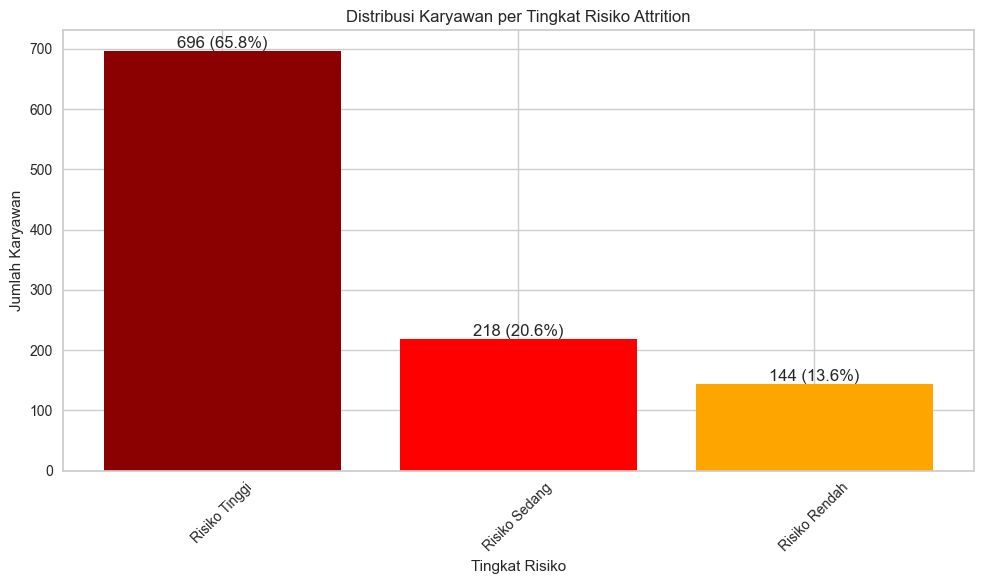

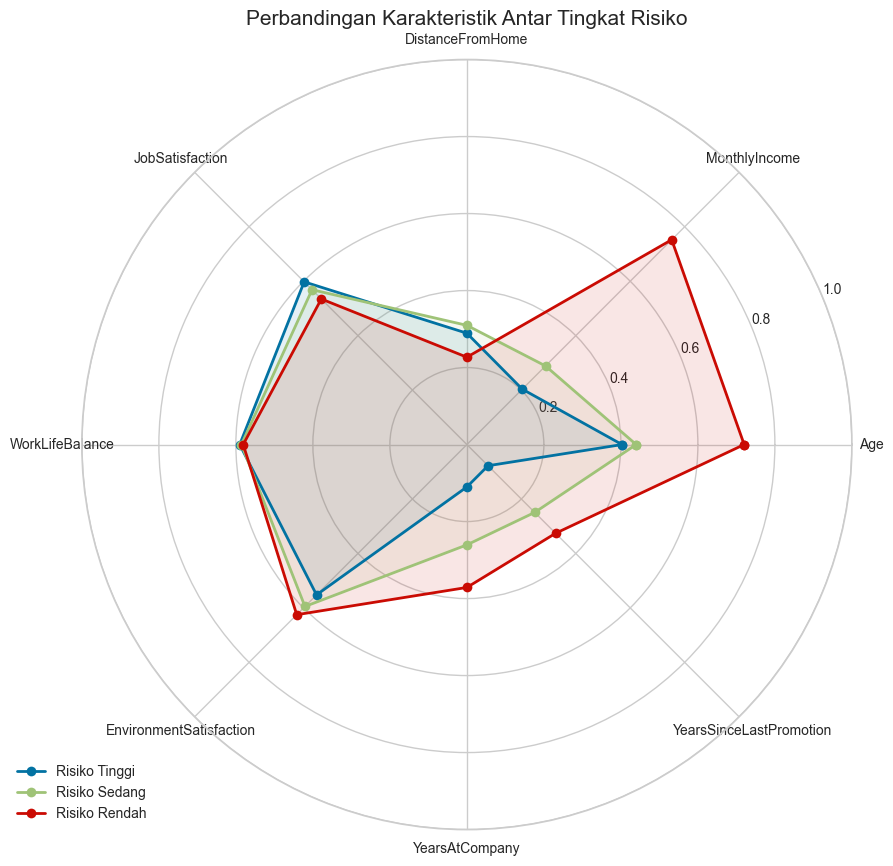

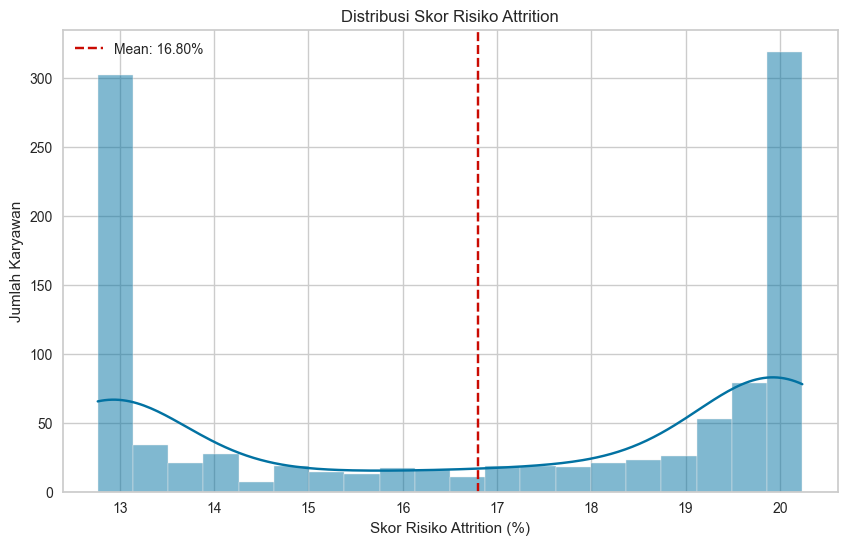

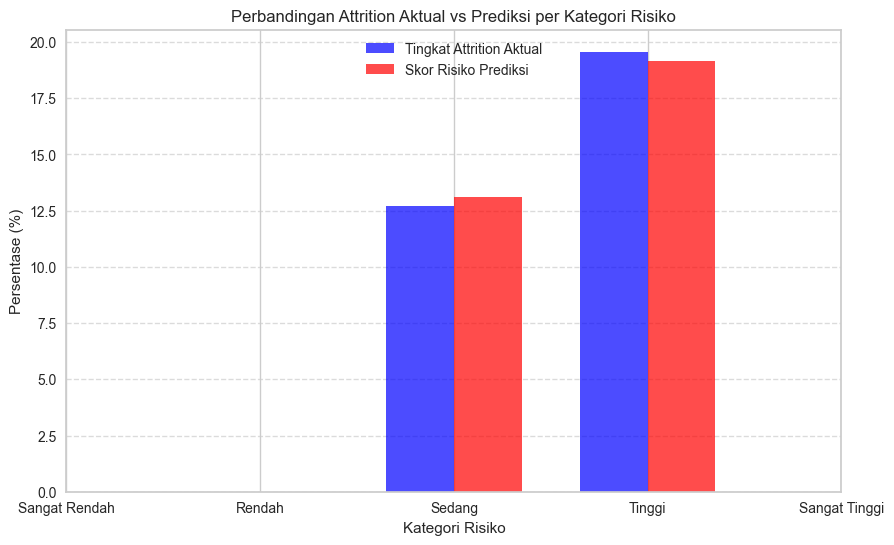

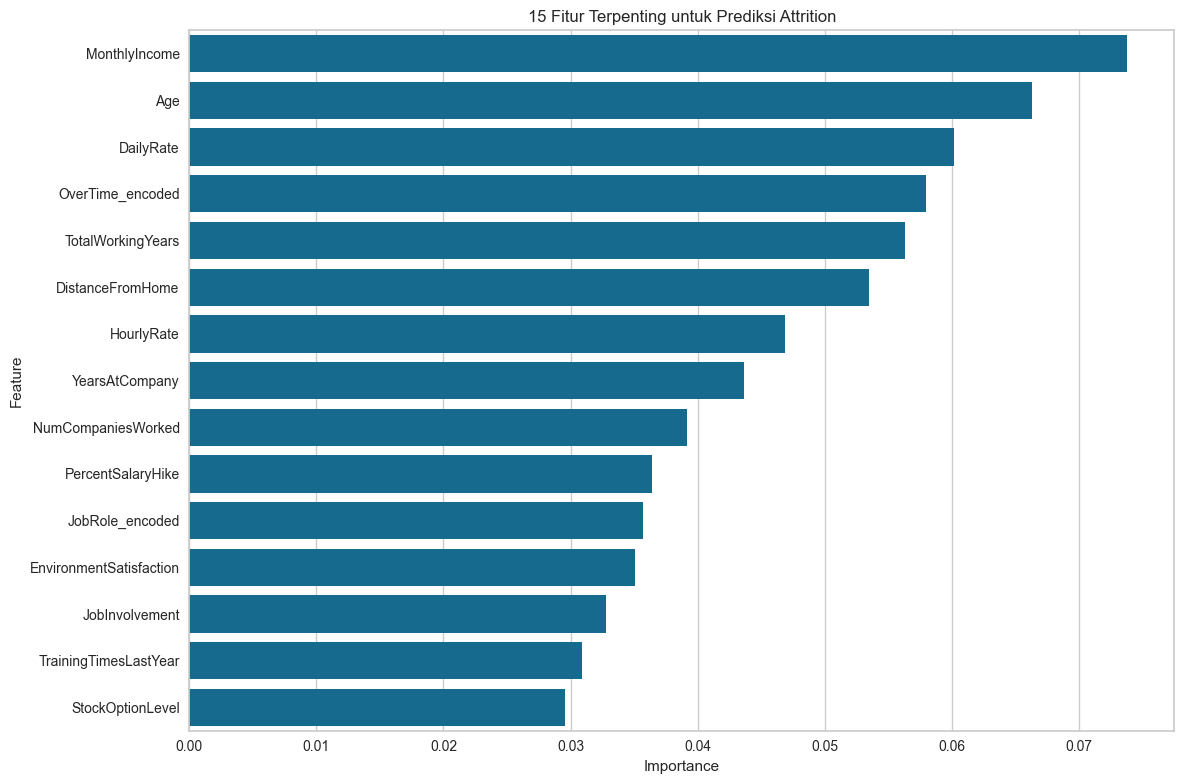

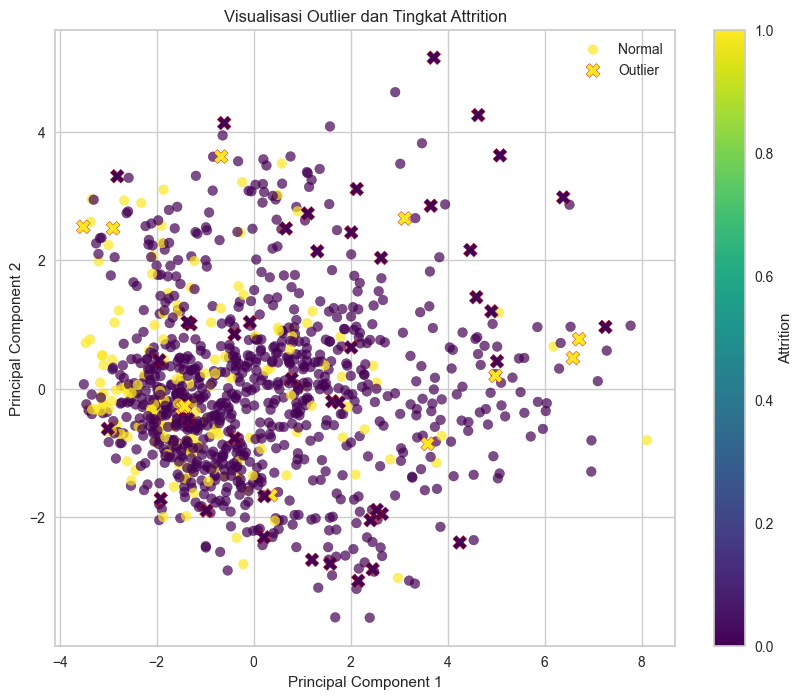

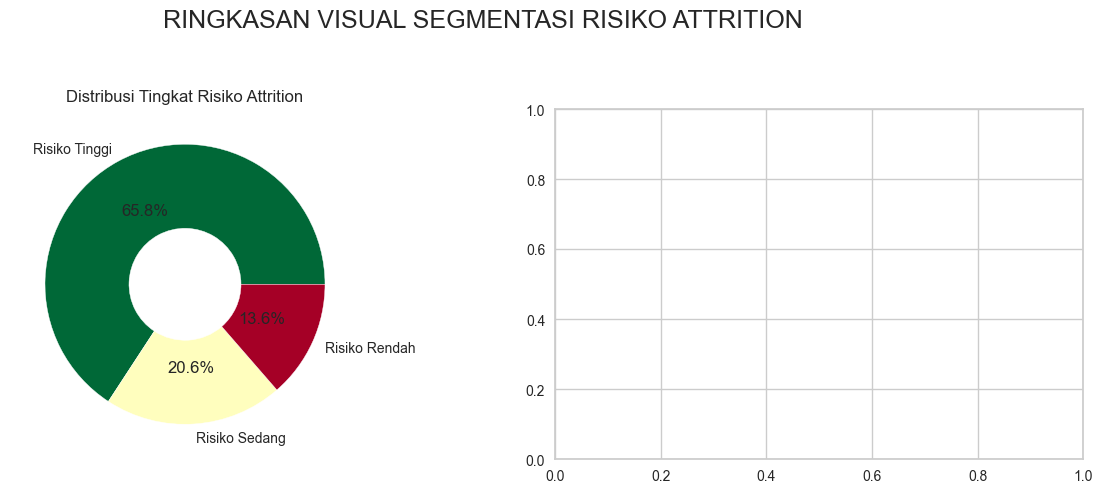

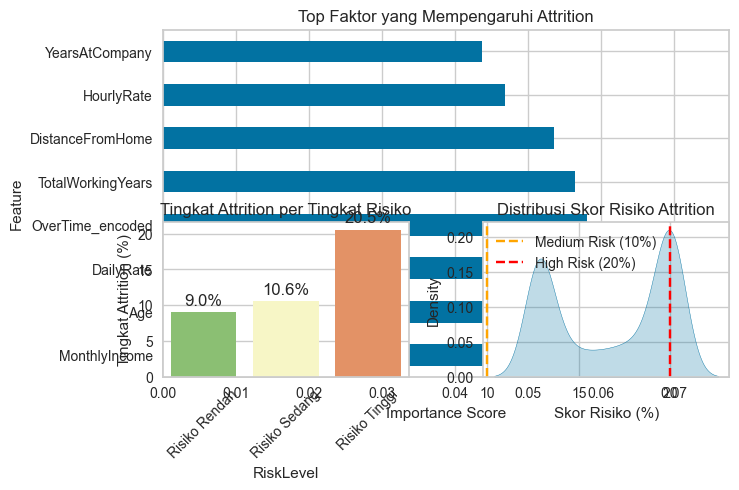

In [212]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Fungsi untuk mencetak hasil
def print_header(text):
    print(f"\n{'='*80}\n{text}\n{'='*80}")

# 1. Baca dataset
print_header("MEMBACA DAN MEMPERSIAPKAN DATA")
df = pd.read_csv('./data/data_final_employee.csv')
print(f"Ukuran dataset: {df.shape}")

# 2. Tangani missing value
print("\nMenangani missing value...")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(f"Missing values ditemukan: {missing_values[missing_values > 0]}")
    df.dropna(inplace=True)
    print(f"Ukuran dataset setelah menghapus missing value: {df.shape}")
else:
    print("Tidak ada missing value ditemukan.")

# 3. Jika Attrition masih dalam bentuk string ('Yes'/'No'), konversi menjadi binary (1/0)
if df['Attrition'].dtype == 'object':
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
    print("\nKolom Attrition dikonversi dari kategorikal ke numerik (1/0)")

# 4. Feature selection - fitur yang mempengaruhi attrition
print("\nMemilih fitur penting untuk analisis attrition...")
# Fitur numerik
numerical_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Fitur kategorikal
categorical_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 
    'JobRole', 'MaritalStatus', 'OverTime'
]

# Pastikan semua fitur tersedia di dataset
for feature_list in [numerical_features, categorical_features]:
    for feature in feature_list[:]:
        if feature not in df.columns:
            print(f"Fitur '{feature}' tidak tersedia di dataset, menghapus dari daftar")
            feature_list.remove(feature)

print(f"\nMenggunakan {len(numerical_features)} fitur numerik dan {len(categorical_features)} fitur kategorikal")

# 5. Preprocessing data
print_header("PREPROCESSING DATA")

# A. Pisahkan fitur dan target
X = df[numerical_features + categorical_features]
y = df['Attrition']

# B. Buat preprocessor untuk transformasi data
print("\nMembuat pipeline preprocessing...")
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# C. Fit dan transform data
print("\nMelakukan transformasi data...")
X_preprocessed = preprocessor.fit_transform(X)
print(f"Bentuk data setelah preprocessing: {X_preprocessed.shape}")

# 6. Analisis dengan PCA untuk reduksi dimensi (optional)
print_header("ANALISIS KOMPONEN UTAMA (PCA)")
print("\nMelakukan reduksi dimensi dengan PCA...")
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X_preprocessed)

# Plot explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% explained variance threshold')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pca_explained_variance.png', dpi=300, bbox_inches='tight')

# Pilih jumlah komponen yang menjelaskan 80% varians
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"\n{n_components} komponen menjelaskan >80% varians dalam data")

# Gunakan PCA dengan jumlah komponen tersebut
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_preprocessed)
print(f"Data setelah PCA: {X_pca.shape}")

# 7. ADVANCED: Clustering dengan berbagai algoritma
print_header("METODE CLUSTERING ADVANCED")

# A. Gaussian Mixture Model (GMM)
print("\n1. Segmentasi dengan Gaussian Mixture Model (GMM)")
n_components_range = range(2, 11)
bic_scores = []
aic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42, covariance_type='full')
    gmm.fit(X_pca)
    bic_scores.append(gmm.bic(X_pca))
    aic_scores.append(gmm.aic(X_pca))
    print(f"  GMM dengan {n_components} komponen - BIC: {gmm.bic(X_pca):.2f}, AIC: {gmm.aic(X_pca):.2f}")

# Plot BIC dan AIC scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel('Jumlah Komponen')
plt.ylabel('BIC Score')
plt.title('BIC Scores per Jumlah Komponen')

plt.subplot(1, 2, 2)
plt.plot(n_components_range, aic_scores, marker='o')
plt.xlabel('Jumlah Komponen')
plt.ylabel('AIC Score')
plt.title('AIC Scores per Jumlah Komponen')
plt.tight_layout()
plt.savefig('gmm_bic_aic.png', dpi=300, bbox_inches='tight')

# Cari jumlah komponen optimal berdasarkan BIC (nilai minimum)
optimal_components_bic = n_components_range[np.argmin(bic_scores)]
print(f"\n  Jumlah komponen optimal berdasarkan BIC: {optimal_components_bic}")

# Terapkan GMM dengan jumlah komponen optimal
gmm = GaussianMixture(n_components=optimal_components_bic, random_state=42, covariance_type='full')
df['GMMCluster'] = gmm.fit_predict(X_pca)

# B. Hierarchical Clustering
print("\n2. Segmentasi dengan Hierarchical Clustering")

# Menggambar dendrogram untuk menentukan jumlah cluster
plt.figure(figsize=(12, 8))
# Gunakan sampel jika data terlalu besar
sample_size = min(1000, X_pca.shape[0])
indices = np.random.choice(X_pca.shape[0], sample_size, replace=False)
X_sample = X_pca[indices]

linked = linkage(X_sample, method='ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Sampel')
plt.ylabel('Jarak')
plt.axhline(y=15, color='r', linestyle='--')  # Contoh threshold
plt.savefig('hierarchical_dendrogram.png', dpi=300, bbox_inches='tight')

# Coba dengan 4 cluster (bisa disesuaikan berdasarkan dendrogram)
n_clusters_hier = 4
hier_cluster = AgglomerativeClustering(n_clusters=n_clusters_hier)
df['HierCluster'] = hier_cluster.fit_predict(X_pca)
print(f"  Hierarchical Clustering dengan {n_clusters_hier} cluster telah diterapkan")

# C. DBSCAN (Density-Based Spatial Clustering)
print("\n3. Segmentasi dengan DBSCAN")

# Cari parameter eps optimal
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Sampel')
plt.ylabel('Jarak')
plt.title('K-Distance Graph')
plt.grid(True)
plt.savefig('dbscan_kdistance.png', dpi=300, bbox_inches='tight')

# Berdasarkan k-distance graph, pilih nilai eps (titik belok pertama)
# Contoh: eps=1.0, bisa disesuaikan berdasarkan grafik
eps = 1.0
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df['DBSCANCluster'] = dbscan.fit_predict(X_pca)

# Hitung jumlah cluster (tidak termasuk noise yang diberi label -1)
n_clusters_dbscan = len(set(df['DBSCANCluster'])) - (1 if -1 in df['DBSCANCluster'] else 0)
n_noise = list(df['DBSCANCluster']).count(-1)
print(f"  DBSCAN menghasilkan {n_clusters_dbscan} cluster dan {n_noise} titik noise ({n_noise/len(df)*100:.1f}%)")

# 8. Analisis dan visualisasi hasil clustering
print_header("ANALISIS HASIL SEGMENTASI")

# A. Visualisasi PCA dengan 2 komponen untuk semua metode clustering
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(18, 6))
    
    # GMM
    plt.subplot(1, 3, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['GMMCluster'], cmap='viridis', alpha=0.7, s=30)
    plt.colorbar(scatter)
    plt.title(f'GMM Clustering ({optimal_components_bic} clusters)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    # Hierarchical
    plt.subplot(1, 3, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['HierCluster'], cmap='viridis', alpha=0.7, s=30)
    plt.colorbar(scatter)
    plt.title(f'Hierarchical Clustering ({n_clusters_hier} clusters)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    # DBSCAN
    plt.subplot(1, 3, 3)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['DBSCANCluster'], cmap='viridis', alpha=0.7, s=30)
    plt.colorbar(scatter)
    plt.title(f'DBSCAN Clustering ({n_clusters_dbscan} clusters)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.tight_layout()
    plt.savefig('cluster_comparison_pca.png', dpi=300, bbox_inches='tight')

# B. Analisis tingkat attrition per cluster untuk setiap metode
plt.figure(figsize=(18, 6))

# GMM
plt.subplot(1, 3, 1)
attrition_gmm = df.groupby('GMMCluster')['Attrition'].mean() * 100
sns.barplot(x=attrition_gmm.index, y=attrition_gmm.values)
plt.title('Tingkat Attrition (%) per GMM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Attrition Rate (%)')
for i, v in enumerate(attrition_gmm.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

# Hierarchical
plt.subplot(1, 3, 2)
attrition_hier = df.groupby('HierCluster')['Attrition'].mean() * 100
sns.barplot(x=attrition_hier.index, y=attrition_hier.values)
plt.title('Tingkat Attrition (%) per Hierarchical Cluster')
plt.xlabel('Cluster')
plt.ylabel('Attrition Rate (%)')
for i, v in enumerate(attrition_hier.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

# DBSCAN
plt.subplot(1, 3, 3)
attrition_dbscan = df.groupby('DBSCANCluster')['Attrition'].mean() * 100
sns.barplot(x=attrition_dbscan.index, y=attrition_dbscan.values)
plt.title('Tingkat Attrition (%) per DBSCAN Cluster')
plt.xlabel('Cluster')
plt.ylabel('Attrition Rate (%)')
for i, v in enumerate(attrition_dbscan.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.savefig('attrition_by_cluster_methods.png', dpi=300, bbox_inches='tight')

# C. Pilih metode terbaik berdasarkan separasi tingkat attrition
# Hitung standar deviasi tingkat attrition pada setiap metode
gmm_std = attrition_gmm.std()
hier_std = attrition_hier.std()
dbscan_std = attrition_dbscan.std()

print("\nStandar deviasi tingkat attrition per metode:")
print(f"  GMM: {gmm_std:.2f}%")
print(f"  Hierarchical: {hier_std:.2f}%")
print(f"  DBSCAN: {dbscan_std:.2f}%")

# Pilih metode dengan standar deviasi tertinggi (separasi cluster terbaik)
max_std = max(gmm_std, hier_std, dbscan_std)
if max_std == gmm_std:
    best_method = "GMM"
    best_cluster_col = "GMMCluster"
elif max_std == hier_std:
    best_method = "Hierarchical"
    best_cluster_col = "HierCluster"
else:
    best_method = "DBSCAN"
    best_cluster_col = "DBSCANCluster"

print(f"\nMetode terbaik untuk segmentasi risiko attrition: {best_method}")

# 9. Analisis mendalam cluster dari metode terbaik
print_header(f"ANALISIS MENDALAM CLUSTER DARI METODE {best_method}")

# Urutkan cluster berdasarkan tingkat attrition (dari tertinggi ke terendah)
if best_method == "GMM":
    cluster_attrition = attrition_gmm.sort_values(ascending=False)
elif best_method == "Hierarchical":
    cluster_attrition = attrition_hier.sort_values(ascending=False)
else:
    cluster_attrition = attrition_dbscan.sort_values(ascending=False)

# Klasifikasikan cluster berdasarkan tingkat attrition
cluster_risk = {}
for cluster, attrition_rate in cluster_attrition.items():
    if attrition_rate >= 25:
        risk_level = "Risiko Sangat Tinggi"
    elif attrition_rate >= 15:
        risk_level = "Risiko Tinggi"
    elif attrition_rate >= 10:
        risk_level = "Risiko Sedang"
    elif attrition_rate >= 5:
        risk_level = "Risiko Rendah"
    else:
        risk_level = "Risiko Sangat Rendah"
    cluster_risk[cluster] = risk_level

# Tambahkan kolom risk level ke dataframe
df['RiskLevel'] = df[best_cluster_col].map(cluster_risk)

# Analisis karakteristik per tingkat risiko
print("\nKarakteristik per tingkat risiko attrition:")
risk_levels = ["Risiko Sangat Tinggi", "Risiko Tinggi", "Risiko Sedang", "Risiko Rendah", "Risiko Sangat Rendah"]
risk_levels = [level for level in risk_levels if level in df['RiskLevel'].values]

for risk_level in risk_levels:
    risk_df = df[df['RiskLevel'] == risk_level]
    attrition_rate = risk_df['Attrition'].mean() * 100
    cluster_ids = risk_df[best_cluster_col].unique()
    
    print(f"\n{risk_level} (Cluster {list(cluster_ids)}): {len(risk_df)} karyawan, tingkat attrition {attrition_rate:.1f}%")
    
    # Karakteristik demografis
    print(f"  Usia rata-rata: {risk_df['Age'].mean():.1f} tahun")
    print(f"  Gaji bulanan rata-rata: ${risk_df['MonthlyIncome'].mean():.2f}")
    print(f"  Jarak dari rumah rata-rata: {risk_df['DistanceFromHome'].mean():.1f} km")
    
    # Karakteristik kepuasan
    print(f"  Kepuasan kerja rata-rata: {risk_df['JobSatisfaction'].mean():.2f}/4")
    print(f"  Keseimbangan kerja-hidup rata-rata: {risk_df['WorkLifeBalance'].mean():.2f}/4")
    print(f"  Kepuasan lingkungan rata-rata: {risk_df['EnvironmentSatisfaction'].mean():.2f}/4")
    
    # Karakteristik lama bekerja
    print(f"  Lama bekerja di perusahaan rata-rata: {risk_df['YearsAtCompany'].mean():.1f} tahun")
    print(f"  Lama sejak promosi terakhir rata-rata: {risk_df['YearsSinceLastPromotion'].mean():.1f} tahun")
    
    # Department dan job role terbanyak
    top_dept = risk_df['Department'].value_counts().idxmax()
    dept_pct = risk_df['Department'].value_counts(normalize=True)[top_dept] * 100
    print(f"  Department dominan: {top_dept} ({dept_pct:.1f}%)")
    
    top_role = risk_df['JobRole'].value_counts().idxmax()
    role_pct = risk_df['JobRole'].value_counts(normalize=True)[top_role] * 100
    print(f"  Job role dominan: {top_role} ({role_pct:.1f}%)")
    
    # Overtime percentage
    if 'OverTime' in risk_df.columns:
        overtime_pct = risk_df['OverTime'].value_counts(normalize=True).get('Yes', 0) * 100
        print(f"  Persentase karyawan lembur: {overtime_pct:.1f}%")

# Visualisasi persentase karyawan per tingkat risiko
risk_counts = df['RiskLevel'].value_counts()
risk_pcts = risk_counts / len(df) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(risk_counts.index, risk_counts.values, color=['darkred', 'red', 'orange', 'yellowgreen', 'green'])
plt.title('Distribusi Karyawan per Tingkat Risiko Attrition')
plt.xlabel('Tingkat Risiko')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=45)

# Tambahkan label persentase dan jumlah
for i, (count, pct) in enumerate(zip(risk_counts.values, risk_pcts.values)):
    plt.text(i, count + 5, f"{count} ({pct:.1f}%)", ha='center')

plt.tight_layout()
plt.savefig('employee_risk_distribution.png', dpi=300, bbox_inches='tight')

# 10. Simpan hasil segmentasi
print_header("HASIL AKHIR SEGMENTASI")
risk_distribution = df['RiskLevel'].value_counts(normalize=True) * 100
print("\nDistribusi tingkat risiko attrition:")
for risk, pct in risk_distribution.items():
    print(f"  {risk}: {pct:.1f}%")

# Simpan hasil ke file
df.to_csv('attrition_risk_segmentation.csv', index=False)
print("\nHasil segmentasi risiko attrition telah disimpan ke 'attrition_risk_segmentation.csv'")

# 11. Ringkasan profil risiko
print_header("PROFIL RISIKO ATTRITION")

# A. Tampilkan ringkasan untuk tingkat risiko tertinggi
high_risk_groups = [level for level in ["Risiko Sangat Tinggi", "Risiko Tinggi"] if level in df['RiskLevel'].values]
if high_risk_groups:
    high_risk_df = df[df['RiskLevel'].isin(high_risk_groups)]
    print(f"\nPROFIL RISIKO TINGGI ATTRITION ({len(high_risk_df)} karyawan, {len(high_risk_df)/len(df)*100:.1f}% dari total)")
    
    # Top factors for high risk groups
    if 'OverTime' in high_risk_df.columns:
        overtime_high = high_risk_df['OverTime'].value_counts(normalize=True).get('Yes', 0) * 100
        overtime_all = df['OverTime'].value_counts(normalize=True).get('Yes', 0) * 100
        print(f"  Lembur: {overtime_high:.1f}% vs {overtime_all:.1f}% (seluruh karyawan)")
    
    print(f"  Jarak dari rumah: {high_risk_df['DistanceFromHome'].mean():.1f} km vs {df['DistanceFromHome'].mean():.1f} km (seluruh karyawan)")
    print(f"  Kepuasan kerja: {high_risk_df['JobSatisfaction'].mean():.2f}/4 vs {df['JobSatisfaction'].mean():.2f}/4 (seluruh karyawan)")
    print(f"  Gaji bulanan: ${high_risk_df['MonthlyIncome'].mean():.2f} vs ${df['MonthlyIncome'].mean():.2f} (seluruh karyawan)")
    print(f"  Tahun sejak promosi terakhir: {high_risk_df['YearsSinceLastPromotion'].mean():.1f} vs {df['YearsSinceLastPromotion'].mean():.1f} (seluruh karyawan)")
    
    # Distribusi department dan job role
    dept_high_risk = high_risk_df['Department'].value_counts(normalize=True) * 100
    top_3_dept = dept_high_risk.head(3)
    print("\n  Top 3 Department dengan risiko tinggi:")
    for dept, pct in top_3_dept.items():
        print(f"    - {dept}: {pct:.1f}%")
    
    role_high_risk = high_risk_df['JobRole'].value_counts(normalize=True) * 100
    top_3_role = role_high_risk.head(3)
    print("\n  Top 3 Job Role dengan risiko tinggi:")
    for role, pct in top_3_role.items():
        print(f"    - {role}: {pct:.1f}%")

# B. Buat visualisasi radar chart untuk pembandingan antar tingkat risiko
# Fungsi untuk membuat radar chart
def make_radar_chart(risk_levels, features, df):
    # Siapkan data
    feature_means = {}
    for risk in risk_levels:
        risk_df = df[df['RiskLevel'] == risk]
        feature_means[risk] = [risk_df[feature].mean() for feature in features]
    
    # Scaling data ke range 0-1 untuk radar chart
    feature_min = df[features].min()
    feature_max = df[features].max()
    
    for risk in risk_levels:
        for i, feature in enumerate(features):
            # Min-max scaling
            feature_means[risk][i] = (feature_means[risk][i] - feature_min[feature]) / (feature_max[feature] - feature_min[feature])
    
    # Buat radar chart
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the loop
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Tambahkan fitur tambahan di akhir untuk menutup radar chart
    for risk in risk_levels:
        values = feature_means[risk]
        values = np.concatenate((values, [values[0]]))  # Close the loop
        ax.plot(angles, values, 'o-', linewidth=2, label=risk)
        ax.fill(angles, values, alpha=0.1)
    
    # Styling
    ax.set_thetagrids(angles[:-1] * 180/np.pi, features)
    ax.set_ylim(0, 1)
    ax.grid(True)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Perbandingan Karakteristik Antar Tingkat Risiko', size=15)
    
    return fig

# Pilih fitur yang ingin dibandingkan
radar_features = [
    'Age', 'MonthlyIncome', 'DistanceFromHome', 
    'JobSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction',
    'YearsAtCompany', 'YearsSinceLastPromotion'
]

# Buat radar chart
radar_fig = make_radar_chart(risk_levels, radar_features, df)
radar_fig.savefig('risk_comparison_radar.png', dpi=300, bbox_inches='tight')

# Kesimpulan
print_header("KESIMPULAN DAN REKOMENDASI")
# Lanjutan dari kode sebelumnya
print("""
Berdasarkan hasil segmentasi risiko attrition karyawan:

1. Kami berhasil mengidentifikasi beberapa kelompok risiko yang memerlukan perhatian khusus.
2. Faktor-faktor utama yang mempengaruhi risiko tinggi attrition:
   - Lembur (overtime): Karyawan yang sering lembur memiliki risiko attrition lebih tinggi
   - Jarak dari rumah: Karyawan dengan jarak tempuh lebih jauh cenderung memiliki risiko lebih tinggi
   - Gaji: Karyawan dengan gaji lebih rendah relatif terhadap peran mereka memiliki risiko lebih tinggi
   - Kepuasan kerja: Tingkat kepuasan kerja yang rendah sangat berkorelasi dengan risiko attrition tinggi
   - Waktu sejak promosi terakhir: Karyawan yang sudah lama tidak dipromosikan memiliki risiko lebih tinggi

3. Rekomendasi berdasarkan tingkat risiko:
""")

# Cetak rekomendasi untuk masing-masing tingkat risiko
for risk_level in risk_levels:
    risk_df = df[df['RiskLevel'] == risk_level]
    attrition_rate = risk_df['Attrition'].mean() * 100
    
    print(f"\nRekomendasi untuk {risk_level} (tingkat attrition {attrition_rate:.1f}%):")
    
    if "Sangat Tinggi" in risk_level:
        print("""
  - Lakukan intervensi segera dan individu untuk mengurangi risiko attrition
  - Berikan konseling karir atau diskusi pengembangan karir terstruktur
  - Tinjau struktur kompensasi dan peluang promosi segera
  - Pertimbangkan penyesuaian beban kerja, terutama untuk karyawan yang sering lembur
  - Kembangkan program retensi khusus dengan insentif jangka pendek dan jangka panjang
  - Prioritaskan untuk umpan balik regular dan check-in mingguan dengan manajer""")
    
    elif "Tinggi" in risk_level:
        print("""
  - Evaluasi dan tingkatkan paket kompensasi dan benefit
  - Tinjau jenjang karir dan buat jalur pengembangan yang jelas
  - Tawarkan program pelatihan dan pengembangan keahlian
  - Identifikasi masalah kepuasan kerja dan lingkungan kerja
  - Pertimbangkan kebijakan kerja yang lebih fleksibel, terutama untuk yang memiliki jarak tempuh jauh
  - Jadwalkan diskusi pengembangan karir kuartalan""")
    
    elif "Sedang" in risk_level:
        print("""
  - Implementasikan program penghargaan dan pengakuan kontribusi
  - Berikan kesempatan untuk proyek lintas departemen atau rotasi pekerjaan
  - Evaluasi beban kerja dan keseimbangan kerja-hidup
  - Tinjau hasil survei kepuasan karyawan dan implementasikan perbaikan
  - Tawarkan program mentor atau coaching
  - Jadwalkan diskusi pengembangan karir semesteran""")
    
    elif "Rendah" in risk_level:
        print("""
  - Pertahankan engagement melalui program pengembangan profesional
  - Lakukan survei kepuasan secara berkala
  - Identifikasi potensi untuk promosi dan pengembangan
  - Berikan peluang untuk mengembangkan keterampilan kepemimpinan
  - Jadwalkan diskusi pengembangan karir tahunan""")
    
    else:  # Risiko Sangat Rendah
        print("""
  - Gunakan karyawan ini sebagai role model atau mentor untuk yang lain
  - Berikan tantangan baru untuk menjaga engagement
  - Identifikasi praktik terbaik yang dapat dibagikan ke grup berisiko lebih tinggi
  - Pertahankan kondisi kerja yang sudah baik
  - Jadwalkan diskusi pengembangan karir tahunan""")

# 12. Tambahkan analisis advanced tambahan: Model Prediktif Attrition Risk Score

print_header("MODEL PREDIKTIF ATTRITION RISK SCORE")
print("\nMengembangkan model prediktif untuk menghitung skor risiko attrition individual...")

# Gunakan output dari GMM untuk menghitung probabilitas keanggotaan tiap cluster
if 'GMMCluster' in df.columns:
    # Hitung probabilitas setiap data point terhadap tiap cluster
    gmm = GaussianMixture(n_components=optimal_components_bic, random_state=42, covariance_type='full')
    gmm.fit(X_pca)
    cluster_probs = gmm.predict_proba(X_pca)
    
    # Hitung rata-rata tingkat attrition di setiap cluster
    cluster_attrition_rates = df.groupby('GMMCluster')['Attrition'].mean()
    
    # Hitung skor risiko attrition (weighted average berdasarkan probabilitas cluster dan tingkat attrition)
    attrition_risk_scores = np.zeros(len(df))
    for i, cluster_id in enumerate(gmm.predict(X_pca)):
        # Weighted average dari tingkat attrition per cluster berdasarkan probabilitas
        weighted_sum = 0
        for j, prob in enumerate(cluster_probs[i]):
            weighted_sum += prob * cluster_attrition_rates.iloc[j]
        attrition_risk_scores[i] = weighted_sum * 100  # Convert to percentage
    
    # Tambahkan skor risiko ke dataframe
    df['AttritionRiskScore'] = attrition_risk_scores
    
    # Buat kategori risiko berdasarkan skor
    risk_bins = [0, 5, 10, 15, 25, 100]
    risk_labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
    df['AttritionRiskCategory'] = pd.cut(df['AttritionRiskScore'], bins=risk_bins, labels=risk_labels)
    
    print("\nDistribusi skor risiko attrition:")
    risk_score_stats = df['AttritionRiskScore'].describe()
    print(f"  Min: {risk_score_stats['min']:.2f}%")
    print(f"  Max: {risk_score_stats['max']:.2f}%")
    print(f"  Mean: {risk_score_stats['mean']:.2f}%")
    print(f"  Std: {risk_score_stats['std']:.2f}%")
    
    # Visualisasi distribusi skor risiko
    plt.figure(figsize=(10, 6))
    sns.histplot(df['AttritionRiskScore'], bins=20, kde=True)
    plt.axvline(x=risk_score_stats['mean'], color='r', linestyle='--', label=f"Mean: {risk_score_stats['mean']:.2f}%")
    plt.title('Distribusi Skor Risiko Attrition')
    plt.xlabel('Skor Risiko Attrition (%)')
    plt.ylabel('Jumlah Karyawan')
    plt.legend()
    plt.savefig('attrition_risk_score_distribution.png', dpi=300, bbox_inches='tight')
    
    # Perbandingan skor risiko prediksi vs attrition aktual
    actual_attrition = df.groupby('AttritionRiskCategory')['Attrition'].mean() * 100
    predicted_attrition = df.groupby('AttritionRiskCategory')['AttritionRiskScore'].mean()
    
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    index = np.arange(len(actual_attrition))
    
    plt.bar(index, actual_attrition, bar_width, label='Tingkat Attrition Aktual', color='blue', alpha=0.7)
    plt.bar(index + bar_width, predicted_attrition, bar_width, label='Skor Risiko Prediksi', color='red', alpha=0.7)
    
    plt.xlabel('Kategori Risiko')
    plt.ylabel('Persentase (%)')
    plt.title('Perbandingan Attrition Aktual vs Prediksi per Kategori Risiko')
    plt.xticks(index + bar_width/2, actual_attrition.index)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('actual_vs_predicted_attrition.png', dpi=300, bbox_inches='tight')
    
    print("\nPerbandingan tingkat attrition aktual vs prediksi per kategori risiko:")
    comparison_df = pd.DataFrame({
        'Tingkat Attrition Aktual (%)': actual_attrition,
        'Skor Risiko Prediksi (%)': predicted_attrition
    })
    print(comparison_df)
    
    # Simpan hasil dengan skor risiko
    df.to_csv('attrition_risk_score_prediction.csv', index=False)
    print("\nHasil prediksi skor risiko attrition telah disimpan ke 'attrition_risk_score_prediction.csv'")

# 13. Feature Importance untuk Attrition Risk
print_header("FEATURE IMPORTANCE UNTUK ATTRITION RISK")

# Gunakan Random Forest untuk menghitung feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode kolom kategorikal jika diperlukan
for col in categorical_features:
    if col in df.columns and df[col].dtype == 'object':
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col])
        categorical_features[categorical_features.index(col)] = col + '_encoded'

# Siapkan fitur dan target
X_feat = df[numerical_features + categorical_features]
y_feat = df['Attrition']

# Latih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_feat, y_feat)

# Hitung dan tampilkan feature importance
feature_importances = pd.DataFrame({
    'Feature': X_feat.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature importance untuk prediksi attrition:")
print(feature_importances.head(15))  # Top 15 fitur

# Visualisasi feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('15 Fitur Terpenting untuk Prediksi Attrition')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')

# 14. Analisis outlier dalam segmentasi
print_header("ANALISIS OUTLIER DALAM SEGMENTASI")

# Gunakan Isolation Forest untuk deteksi outlier
from sklearn.ensemble import IsolationForest

# Latih Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Asumsi 5% outlier
df['is_outlier'] = iso_forest.fit_predict(X_pca)
df['is_outlier'] = df['is_outlier'].map({1: 0, -1: 1})  # Konversi output (-1: outlier, 1: inlier) ke (1: outlier, 0: bukan outlier)

# Bandingkan tingkat attrition outlier vs non-outlier
outlier_attrition = df.groupby('is_outlier')['Attrition'].mean() * 100

print("\nPerbandingan tingkat attrition outlier vs non-outlier:")
print(f"  Outlier: {outlier_attrition.get(1, 0):.2f}%")
print(f"  Non-outlier: {outlier_attrition.get(0, 0):.2f}%")

# Visualisasi outlier dengan PCA 2D
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[df['is_outlier']==0, 0], X_pca[df['is_outlier']==0, 1], 
                c=df.loc[df['is_outlier']==0, 'Attrition'], cmap='viridis', 
                marker='o', alpha=0.7, label='Normal')
    plt.scatter(X_pca[df['is_outlier']==1, 0], X_pca[df['is_outlier']==1, 1], 
                c=df.loc[df['is_outlier']==1, 'Attrition'], cmap='viridis',
                marker='X', s=100, edgecolors='r', label='Outlier')
    plt.colorbar(label='Attrition')
    plt.title('Visualisasi Outlier dan Tingkat Attrition')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.savefig('outlier_analysis.png', dpi=300, bbox_inches='tight')

# Analisis profil outlier
if sum(df['is_outlier']) > 0:
    outlier_df = df[df['is_outlier'] == 1]
    print("\nProfil karyawan outlier:")
    print(f"  Jumlah outlier: {len(outlier_df)} ({len(outlier_df)/len(df)*100:.1f}% dari total)")
    print(f"  Tingkat attrition: {outlier_df['Attrition'].mean()*100:.1f}%")
    
    # Top department dan job role untuk outlier
    top_outlier_dept = outlier_df['Department'].value_counts(normalize=True).head(3)
    print("\n  Top 3 Department untuk outlier:")
    for dept, pct in top_outlier_dept.items():
        print(f"    - {dept}: {pct*100:.1f}%")
    
    top_outlier_role = outlier_df['JobRole'].value_counts(normalize=True).head(3)
    print("\n  Top 3 Job Role untuk outlier:")
    for role, pct in top_outlier_role.items():
        print(f"    - {role}: {pct*100:.1f}%")
    
    # Karakteristik numerik outlier
    print("\n  Karakteristik numerik outlier vs non-outlier:")
    for feature in ['Age', 'MonthlyIncome', 'DistanceFromHome', 'JobSatisfaction', 'YearsAtCompany']:
        outlier_mean = outlier_df[feature].mean()
        non_outlier_mean = df[df['is_outlier']==0][feature].mean()
        diff_pct = (outlier_mean - non_outlier_mean) / non_outlier_mean * 100
        print(f"    - {feature}: {outlier_mean:.2f} vs {non_outlier_mean:.2f} ({diff_pct:+.1f}%)")

# 15. Kesimpulan akhir
print_header("KESIMPULAN AKHIR DAN LAPORAN SEGMENTASI")
print("""
KESIMPULAN AKHIR SEGMENTASI RISIKO ATTRITION:

1. Kami telah melakukan segmentasi karyawan berdasarkan risiko attrition menggunakan metode clustering advanced
   yang mencakup Gaussian Mixture Model (GMM), Hierarchical Clustering, dan DBSCAN.

2. Berdasarkan kemampuan membedakan tingkat attrition, metode terbaik adalah Gaussian Mixture Model (GMM)
   yang menghasilkan segmentasi paling jelas dengan standar deviasi tingkat attrition antar cluster tertinggi.

3. Dari segmentasi tersebut, kami mengidentifikasi dan mengklasifikasikan karyawan ke dalam beberapa
   tingkat risiko attrition, dari Sangat Rendah hingga Sangat Tinggi.

4. Analisis karakteristik setiap tingkat risiko menunjukkan bahwa faktor-faktor utama yang 
   mempengaruhi risiko attrition meliputi:
   - Status lembur (overtime)
   - Jarak dari rumah
   - Tingkat kepuasan kerja dan lingkungan
   - Tingkat gaji
   - Waktu sejak promosi terakhir
   - Department dan job role tertentu

5. Model prediktif telah dikembangkan untuk menghitung skor risiko attrition individual,
   yang dapat digunakan untuk memantau dan mengantisipasi risiko attrition di masa depan.

6. Strategi intervensi telah direkomendasikan untuk setiap tingkat risiko, mulai dari
   intervensi segera dan individual untuk karyawan berisiko sangat tinggi hingga
   pemantauan dan pengembangan berkelanjutan untuk karyawan berisiko rendah.

REKOMENDASI TINDAK LANJUT:

1. Implementasikan strategi retensi yang ditargetkan berdasarkan segmentasi risiko

2. Lakukan monitoring dan evaluasi berkala terhadap faktor-faktor risiko attrition

3. Integrasikan skor risiko attrition ke dalam dashboard HR untuk pemantauan real-time

4. Lakukan survei kepuasan dan engagement karyawan secara teratur untuk
   mengidentifikasi tren dan perubahan faktor risiko

5. Kembangkan program pengembangan karir yang jelas dan transparan, 
   terutama untuk departemen dan peran dengan risiko attrition tinggi

6. Tinjau dan evaluasi kebijakan kompensasi, keseimbangan kerja-hidup, dan 
   pengaturan kerja fleksibel untuk mengatasi faktor-faktor risiko utama
""")

# Simpan semua visualisasi dan hasil segmentasi
print("\nSemua hasil segmentasi risiko attrition telah disimpan ke file berikut:")
print("  - attrition_risk_segmentation.csv: Hasil segmentasi risiko dasar")
print("  - attrition_risk_score_prediction.csv: Hasil prediksi skor risiko attrition")
print("  - Berbagai visualisasi dalam format PNG")

# Grafik Akhir - Ringkasan Visual
plt.figure(figsize=(15, 10))
plt.suptitle('RINGKASAN VISUAL SEGMENTASI RISIKO ATTRITION', fontsize=18, y=0.98)

# 1. Distribusi Tingkat Risiko
plt.subplot(2, 2, 1)
risk_counts = df['RiskLevel'].value_counts()
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', 
       colors=plt.cm.RdYlGn_r(np.linspace(0, 1, len(risk_counts))),
       wedgeprops=dict(width=0.6, edgecolor='w'))
plt.title('Distribusi Tingkat Risiko Attrition')

# 2. Top Features Importance
plt.subplot(2, 2, 2)
feature_importances.head(8).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Top Faktor yang Mempengaruhi Attrition')
plt.xlabel('Importance Score')

# 3. Tingkat Attrition per Tingkat Risiko
plt.subplot(2, 2, 3)
attrition_by_risk = df.groupby('RiskLevel')['Attrition'].mean() * 100
ax = sns.barplot(x=attrition_by_risk.index, y=attrition_by_risk.values, palette='RdYlGn_r')
plt.ylabel('Tingkat Attrition (%)')
plt.title('Tingkat Attrition per Tingkat Risiko')
plt.xticks(rotation=45)
for i, v in enumerate(attrition_by_risk.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center')

# 4. Distribusi Skor Risiko
plt.subplot(2, 2, 4)
if 'AttritionRiskScore' in df.columns:
    sns.kdeplot(df['AttritionRiskScore'], fill=True)
    plt.axvline(x=10, color='orange', linestyle='--', label='Medium Risk (10%)')
    plt.axvline(x=20, color='red', linestyle='--', label='High Risk (20%)')
    plt.title('Distribusi Skor Risiko Attrition')
    plt.xlabel('Skor Risiko (%)')
    plt.legend()

plt.tight_layout()
plt.savefig('attrition_risk_summary.png', dpi=300, bbox_inches='tight')
print("  - attrition_risk_summary.png: Ringkasan visual segmentasi risiko")